## 大作业组员：
## 张艺馨15210130100   
## 徐灿15210130091  
## 马绍炎15210130072

## -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

# 项目题目：
### 基于python的网络数据挖掘——以天涯论坛和豆瓣电影为例(Part I)

# 项目摘要：
基于python语言和Anaconda计算环境，在天涯论坛以“Facebook”为主题词进行搜索，用爬虫抓取该主题下的帖子列表、回帖信息、以及作者信息。对数据进行清洗、描述、文本分析，例如：创建图云，分析词频；基于回帖内容建立主题模型，构建基于物的相似性的给用户推荐帖子的推荐系统；构建回帖网络，对回帖网络进行分析和描述。利用爬虫抓取了豆瓣电影TOP250列表和影评文本，以排名第一的“肖申克的救赎”为例，并进行上述分析和描述。

# 引言：
Facebook是美国的一个社交网络服务网站 ，于2004年2月4日上线。主要创始人为美国人马克·扎克伯格。Facebook是世界排名领先的社交网络，2015 年用户数量突破 10 亿，然而，Facebook能否进入中国还有诸多悬念。作为在全球具有影响力的老牌华人网络社区，天涯论坛上，人们对于Facebook有着怎样的讨论呢？我们使用python进行了数据抓取。

# 研究思路：
基于python语言和Anaconda计算环境，使用正则表达式，以及Urlib和Beautiful Soup等开源数据库实现。爬取对象为天涯论坛“Facebook”主题页面和豆瓣电影TOP250页面、具体电影评论页面的信息。研究目的是对文本进行挖掘，探索文本中的主题关键词、用户之间的联系和网络结构。

# 目录：
## 1.天涯帖子抓取：
### 1.1 Facebook主题贴抓取 1.2抓取作者信息 1.3抓取帖子回复 
## 2.对数据进行清洗描述：将数据按年份进行分割 
## 3.天涯Facebook主题贴数据分析：
### 3.1 分析天涯所有Facebook相关回帖的时间 3.2 分析天涯所有Facebook相关回帖的点击率 
## 4.天涯Facebook主题贴文本分析：
### 4.1基于TDIDF算法的关键词抽取 4.2基于 TextRank 算法的关键词抽取 4.3 结合Tf－idf和TextRank算法绘制12-16年关键词权重图 4.4基于Tf－idf算法绘制12-16年相关回帖词云 4.5 关键词时间序列分析 4.6 关键词Kmeans聚类分析
## 5.天涯Facebook相关帖子主题模型构建
## 6.天涯Facebook相关帖子推荐系统
## 7.天涯Facebook相关帖子回帖网络构建
## 8.总结

## ============================================

# 1. 天涯帖子抓取

## 1.1 Facebook主题贴抓取

In [2]:
import urllib2
from bs4 import BeautifulSoup
from IPython.display import display_html, HTML
HTML('<iframe src=http://bbs.tianya.cn/list.jsp?item=free&grade=0&order=1&su=0&k=facebook width=1000 height=500></iframe>')

In [7]:
def crawler(page_num, file_name):
    try:
        url = "http://bbs.tianya.cn/list.jsp?item=free&grade=0&order=1&su=0&k=facebook" 
        content = urllib2.urlopen(url).read() 
        soup = BeautifulSoup(content, "lxml") 
        articles = soup.find_all('tr')
        for i in articles[1:]:
            td = i.find_all('td')
            title = td[0].text.strip()
            title_url = td[0].a['href']
            author = td[1].text
            author_url = td[1].a['href']
            views = td[2].text
            replies = td[3].text
            date = td[4]['title']
            record = title + '\t' + title_url+ '\t' + author + '\t'+ \
                        author_url + '\t' + views+ '\t'  + replies+ '\t'+ date
            with open(file_name,'a') as p: 
                        p.write(record.encode('utf-8')+"\n") 
    except Exception, e:
        print e
        pass

In [8]:
for page_num in range(10):
    print (page_num)
    crawler(page_num, '/Users/zhangyixin/Desktop/facebook/facebooklist.txt') 

0
1
2
3
4
5
6
7
8
9


In [17]:
import pandas as pd

df = pd.read_csv('/Users/zhangyixin/Desktop/facebook/facebooklist.txt', sep = "\t", header=None)
df[:10]

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:818: UserWarning: Could not find matplotlibrc; using defaults
  warnings.warn('Could not find matplotlibrc; using defaults')
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:972: UserWarning: could not find rc file; returning defaults
  warnings.warn(message)


,0,1,2,3,4,5,6
0,"母亲节刷暴香港facebook ,广东朋友圈嘅MV首歌就叫做《青葱》",/post-free-5495969-1.shtml,梁海欣故事,http://www.tianya.cn/81346212,24,1,2016-06-14 15:04
1,5月30日Facebook有关欧阳黎老师家暴的新帖和照片,/post-free-5483503-1.shtml,sunlight808,http://www.tianya.cn/113032738,203,4,2016-06-01 08:52
2,"Facebook好友晒迪拜之旅,我看到了海尔",/post-free-5451954-1.shtml,灵瑞07,http://www.tianya.cn/111892702,67,0,2016-05-01 14:24
3,"QQ,微信,facebook,GaGa你喜欢玩哪一个社交软件?",/post-free-5431064-1.shtml,GaGaMatch社区,http://www.tianya.cn/96176634,41,0,2016-04-08 14:57
4,有个日杂在百度facebook吧里说南京大屠杀慰安妇台湾光复是谎...,/post-free-5375770-1.shtml,guojiazhixu,http://www.tianya.cn/105728326,132,4,2016-01-29 21:19
5,facebook叫脸书?谁告诉你的?,/post-free-5369769-1.shtml,yeechyu,http://www.tianya.cn/95402540,372,3,2016-01-22 16:24
6,"远征facebook的人,你们是多无趣,无聊啊",/post-free-5369532-1.shtml,重越归来,http://www.tianya.cn/107341681,157,2,2016-01-22 12:52
7,"Facebook旗下WhatsApp取消年费,微信的末日要来了?",/post-free-5369456-1.shtml,空山2016,http://www.tianya.cn/108561458,846,31,2016-01-22 11:30
8,Facebook其实是某大国的情报机构,/post-free-5351535-1.shtml,斯洛登第三,http://www.tianya.cn/105308530,85,0,2016-01-02 15:33
9,【墨子时评】 小扎与奥马巴:从Facebook裸捐看中国传媒裸奔,/post-free-5326309-1.shtml,墨黑纸白,http://www.tianya.cn/26234327,18680,104,2015-12-03 10:36


In [10]:
len(df)

500

In [8]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:10]

,title,link,author,author_page,click,reply,time
0,"母亲节刷暴香港facebook ,广东朋友圈嘅MV首歌就叫做《青葱》",/post-free-5495969-1.shtml,梁海欣故事,http://www.tianya.cn/81346212,24,1,2016-06-14 15:04
1,5月30日Facebook有关欧阳黎老师家暴的新帖和照片,/post-free-5483503-1.shtml,sunlight808,http://www.tianya.cn/113032738,203,4,2016-06-01 08:52
2,"Facebook好友晒迪拜之旅,我看到了海尔",/post-free-5451954-1.shtml,灵瑞07,http://www.tianya.cn/111892702,67,0,2016-05-01 14:24
3,"QQ,微信,facebook,GaGa你喜欢玩哪一个社交软件?",/post-free-5431064-1.shtml,GaGaMatch社区,http://www.tianya.cn/96176634,41,0,2016-04-08 14:57
4,有个日杂在百度facebook吧里说南京大屠杀慰安妇台湾光复是谎...,/post-free-5375770-1.shtml,guojiazhixu,http://www.tianya.cn/105728326,132,4,2016-01-29 21:19
5,facebook叫脸书?谁告诉你的?,/post-free-5369769-1.shtml,yeechyu,http://www.tianya.cn/95402540,372,3,2016-01-22 16:24
6,"远征facebook的人,你们是多无趣,无聊啊",/post-free-5369532-1.shtml,重越归来,http://www.tianya.cn/107341681,157,2,2016-01-22 12:52
7,"Facebook旗下WhatsApp取消年费,微信的末日要来了?",/post-free-5369456-1.shtml,空山2016,http://www.tianya.cn/108561458,846,31,2016-01-22 11:30
8,Facebook其实是某大国的情报机构,/post-free-5351535-1.shtml,斯洛登第三,http://www.tianya.cn/105308530,85,0,2016-01-02 15:33
9,【墨子时评】 小扎与奥马巴:从Facebook裸捐看中国传媒裸奔,/post-free-5326309-1.shtml,墨黑纸白,http://www.tianya.cn/26234327,18680,104,2015-12-03 10:36


##  1.2 抓取作者信息

In [12]:
def author_crawler(url, file_name):
    try:
        content = urllib2.urlopen(url).read() 
        soup = BeautifulSoup(content, "lxml")
        link_info = soup.find_all('div', {'class', 'link-box'})
        followed_num, fans_num = [i.a.text for i in link_info]
        try:
            activity = soup.find_all('span', {'class', 'subtitle'})
            post_num, reply_num = [j.text[2:] for i in activity[:1] for j in i('a')]
        except:
            post_num, reply_num = 1, 0
        record =  '\t'.join([url, followed_num, fans_num, post_num, reply_num])
        with open(file_name,'a') as p: 
                    p.write(record.encode('utf-8')+"\n") 
    except Exception, e:
        print e, url
        record =  '\t'.join([url, 'na', 'na', 'na', 'na'])
        with open(file_name,'a') as p: 
                    p.write(record.encode('utf-8')+"\n") 
        pass

In [18]:
for k, url in enumerate(df.author_page):
    if k % 10==0:
        print k
    author_crawler(url, '/Users/zhangyixin/Desktop/facebook/facebookauthorlist.txt') 

0
need more than 0 values to unpack http://www.tianya.cn/105728326
10
20
need more than 0 values to unpack http://www.tianya.cn/10157154
30
40
50
need more than 0 values to unpack http://www.tianya.cn/105728326
60
70
need more than 0 values to unpack http://www.tianya.cn/10157154
80
90
100
need more than 0 values to unpack http://www.tianya.cn/105728326
110
120
need more than 0 values to unpack http://www.tianya.cn/10157154
130
140
150
need more than 0 values to unpack http://www.tianya.cn/105728326
160
170
need more than 0 values to unpack http://www.tianya.cn/10157154
180
190
200
need more than 0 values to unpack http://www.tianya.cn/105728326
210
220
need more than 0 values to unpack http://www.tianya.cn/10157154
230
240
250
need more than 0 values to unpack http://www.tianya.cn/105728326
260
270
need more than 0 values to unpack http://www.tianya.cn/10157154
280
290
300
need more than 0 values to unpack http://www.tianya.cn/105728326
310
320
need more than 0 values to unpack http:/

In [4]:
import pandas as pd

df1 = pd.read_csv('/Users/zhangyixin/Desktop/facebook/facebookauthorlist.txt', sep = "\t", header=None)
df1[:5]

,0,1,2,3,4
0,http://www.tianya.cn/81346212,2,8,9,6
1,http://www.tianya.cn/113032738,0,17,6,417
2,http://www.tianya.cn/111892702,0,0,2,0
3,http://www.tianya.cn/96176634,0,7,92,7
4,http://www.tianya.cn/105728326,na,na,na,na


In [14]:
df1=df1.rename(columns = {0:'link', 1:'followed_num', 2:'fans_num',3:'post_num', 4:'reply_num'})
df1[:5]

,link,followed_num,fans_num,post_num,reply_num
0,http://www.tianya.cn/81346212,2,8,9,6
1,http://www.tianya.cn/113032738,0,17,6,417
2,http://www.tianya.cn/111892702,0,0,2,0
3,http://www.tianya.cn/96176634,0,7,92,7
4,http://www.tianya.cn/105728326,na,na,na,na


In [9]:
data = pd.concat([df,df1], axis=1)
len(data)

500

In [16]:
data[:5]

,title,link,author,author_page,click,reply,time,link,followed_num,fans_num,post_num,reply_num
0,"母亲节刷暴香港facebook ,广东朋友圈嘅MV首歌就叫做《青葱》",/post-free-5495969-1.shtml,梁海欣故事,http://www.tianya.cn/81346212,24,1,2016-06-14 15:04,http://www.tianya.cn/81346212,2,8,9,6
1,5月30日Facebook有关欧阳黎老师家暴的新帖和照片,/post-free-5483503-1.shtml,sunlight808,http://www.tianya.cn/113032738,203,4,2016-06-01 08:52,http://www.tianya.cn/113032738,0,17,6,417
2,"Facebook好友晒迪拜之旅,我看到了海尔",/post-free-5451954-1.shtml,灵瑞07,http://www.tianya.cn/111892702,67,0,2016-05-01 14:24,http://www.tianya.cn/111892702,0,0,2,0
3,"QQ,微信,facebook,GaGa你喜欢玩哪一个社交软件?",/post-free-5431064-1.shtml,GaGaMatch社区,http://www.tianya.cn/96176634,41,0,2016-04-08 14:57,http://www.tianya.cn/96176634,0,7,92,7
4,有个日杂在百度facebook吧里说南京大屠杀慰安妇台湾光复是谎...,/post-free-5375770-1.shtml,guojiazhixu,http://www.tianya.cn/105728326,132,4,2016-01-29 21:19,http://www.tianya.cn/105728326,na,na,na,na


## 1.3 抓取帖子回复

In [17]:
url = 'http://bbs.tianya.cn' + df.link[20]
url

'http://bbs.tianya.cn/post-free-4719164-1.shtml'

In [49]:
from IPython.display import display_html, HTML
HTML('<iframe src=http://bbs.tianya.cn/post-free-4663707-1.shtml width=1000 height=500></iframe>')

In [19]:
post = urllib2.urlopen(url).read() 
post_soup = BeautifulSoup(post, "lxml") 
print (post_soup.prettify())[:2000]

<!DOCTYPE HTML>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   香港是谁的？（转自网友在Facebook发的文章）_天涯杂谈_天涯论坛
  </title>
  <meta content="香港是谁的？（转自网友在Facebook发的文章）　　　　　　香港是誰的？　　一、先看看祖國對香港做了些什麼　　1 、在政治上很講信用。嚴格執行回歸時定下的 “ 一國兩制 ” 方針，將香港作為政治特區迄今為止從沒有任何動搖和改變，在全國通行的法律，沒有一部在香港執行，讓其享有標誌高度自治的司法..." name="description"/>
  <meta content="IE=EmulateIE9" http-equiv="X-UA-Compatible"/>
  <meta content="零零阿柒" name="author"/>
  <meta content="format=xhtml; url=http://bbs.tianya.cn/m/post-free-4719164-1.shtml" http-equiv="mobile-agent"/>
  <link href="http://static.tianyaui.com/global/ty/TY.css" rel="stylesheet" type="text/css"/>
  <link href="http://static.tianyaui.com/global/bbs/web/static/css/bbs_article_76461aa.css" rel="stylesheet" type="text/css"/>
  <link href="http://static.tianyaui.com/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <script type="text/javascript">
   var bbsGlobal = {
	isEhomeItem : false,
	isNewArticle : false,
	authorId : "32849585",
	authorName : "零零阿柒", 
	b

In [20]:
pa = post_soup.find_all('div', {'class', 'atl-item'})
for i in pa[:10]:
    p_info = i.find('a', class_ = 'reportme a-link')
    p_time = p_info['replytime']
    p_author_id = p_info['authorid']
    p_author_name = p_info['author']
    p_content = i.find('div', {'class', 'bbs-content'}).text.strip()
    p_content = p_content.replace('\t', '')
    print p_time, '--->', p_author_id, '--->', p_author_name,'--->', p_content, '\n'

2014-10-22 16:10:00 ---> 32849585 ---> 零零阿柒 ---> 香港是誰的？　　一、先看看祖國對香港做了些什麼　　1 、在政治上很講信用。嚴格執行回歸時定下的 “ 一國兩制 ” 方針，將香港作為政治特區迄今為止從沒有任何動搖和改變，在全國通行的法律，沒有一部在香港執行，讓其享有標誌高度自治的司法終審權、單獨立法權、行政自理權。　　2 、在財政上不用繳稅。作為中國的一部分，香港從來不用向中央政府交一分錢的稅，香港人自己賺的錢自己花，用於香港自身的發展，祖國其他地方再窮再苦也不找香港的麻煩，這一點讓廣東等財稅大省相當羨慕。　　3 、在發展上特殊保護。為了保護香港在國際經濟中的特殊地位和傳統優勢，中央政府一再壓制別的城市，比如上海深水港、自貿區、金融中心、迪士尼等項目的啟動，政府猶豫再三，一拖再拖，生怕對香港不利。　　4 、在貿易上免稅通關。香港的產品進入大陸， 273 種主要產品實行的都是零關稅，這就意味著，大陸巨大市場對香港基本上是敞開的。周邊國家和地區經濟體，對這樣的優厚待遇是垂涎三尺的。　　5 、在旅游上全民支持。中央政府一直大力鼓勵大陸人到香港去旅遊，香港遊的旅行團火得不得了，而去香港旅遊的最主要項目就是購物，大陸人平時捨不得花的錢，大把大把地丟在香港，幫助發展香港的經濟。　　6 、在經濟上甘當後盾。在中國成為全球最大市場的今天，世界上的主要經濟體都很依賴中國，香港自然不例外，甚至在大陸享有投資經營的某些特權，這對香港來說，大陸是其度過經濟危機、持續發展的堅強後盾。　　7 、在民生上優先照顧。香港地方小，山多平地少，幾乎沒有農業，主要靠大陸來滿足對吃喝的要求。大陸每天將最優質最新鮮的肉、菜、蛋、奶源源不斷地送到香港，保證水、電、氣的供應，從不吝嗇，從不含糊。　　8 、在國際上高度尊重。中國在國際上，給予作為地方政府的香港高度尊重、特殊安排，積極支持其以實體身份參與國際事務，比如在各種國際經濟聯盟、各種國際化的運動會上佔有重要席位，可以與中央政府一同參與。　　二、再看看香港有些人是怎麼對待祖國的　　1 、喊出“ 寧當英國狗，不做中國人” 的口號。在香港，總有些人天生的奴才命，不願做人只願做狗，完全是腦袋出了毛病。當主人不好，偏要喜歡去當英國人的走狗，甚至期盼再回到英國殖民時代，這種下賤程度，令人瞠目結舌。　　2 、部分香港人長期搞

In [23]:
url = 'http://bbs.tianya.cn' + df.link[20]
url_base = ''.join(url.split('-')[:-1]) + '-%d.shtml'
url_base

'http://bbs.tianya.cn/postfree4719164-%d.shtml'

In [24]:
def parsePage(pa):
    records = []
    for i in pa:
        p_info = i.find('a', class_ = 'reportme a-link')
        p_time = p_info['replytime']
        p_author_id = p_info['authorid']
        p_author_name = p_info['author']
        p_content = i.find('div', {'class', 'bbs-content'}).text.strip()
        p_content = p_content.replace('\t', '').replace('\n', '')#.replace(' ', '')
        record = p_time + '\t' + p_author_id+ '\t' + p_author_name + '\t'+ p_content
        records.append(record)
    return records

import sys
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [24]:
import random
import time

def crawler(url, file_name):
    try:
        url_1 = 'http://bbs.tianya.cn' + url
        content = urllib2.urlopen(url_1).read() 
        post_soup = BeautifulSoup(content, "lxml") 
        post_form = post_soup.find('div', {'class', 'atl-pages'})
        if post_form.form:
            post_pages = post_form.form['onsubmit'].split(',')[-1].split(')')[0]
            post_pages = int(post_pages)
            url_base = '-'.join(url_1.split('-')[:-1]) + '-%d.shtml'
        else:
            post_pages = 1
        pa = post_soup.find_all('div', {'class', 'atl-item'})
        records = parsePage(pa)
        with open(file_name,'a') as p: 
            for record in records:    
                p.write('1'+ '\t' + url + '\t' + record.encode('utf-8')+"\n") 
        if post_pages > 1:
            for page_num in range(2, post_pages+1):
                time.sleep(random.random())
                flushPrint(page_num)
                url2 =url_base  % page_num
                content = urllib2.urlopen(url2).read() 
                post_soup = BeautifulSoup(content, "lxml") 
                pa = post_soup.find_all('div', {'class', 'atl-item'})
                records = parsePage(pa)
                with open(file_name,'a') as p: 
                    for record in records:    
                        p.write(str(page_num) + '\t' +url + '\t' + record.encode('utf-8')+"\n") 
        else:
            pass
    except Exception, e:
        print e
        pass

In [36]:
for k, link in enumerate(df.link):
    flushPrint(link)
    if k % 10== 0:
        print 'This it the post of : ' + str(k)
    file_name = '/Users/zhangyixin/Desktop/facebook/facebook_threads_network.txt'
    crawler(link, file_name)

/post-free-5495969-1.shtmlThis it the post of : 0
/post-free-5308428-1.shtmlThis it the post of : 10
/post-free-4719164-1.shtmlThis it the post of : 20
/post-free-4050909-1.shtmlThis it the post of : 30
/post-free-3266225-1.shtmlThis it the post of : 40
/post-free-5495969-1.shtmlThis it the post of : 50
/post-free-5308428-1.shtmlThis it the post of : 60
/post-free-4719164-1.shtmlThis it the post of : 70
/post-free-4050909-1.shtmlThis it the post of : 80
/post-free-3266225-1.shtmlThis it the post of : 90
/post-free-5495969-1.shtmlThis it the post of : 100
/post-free-5308428-1.shtmlThis it the post of : 110
/post-free-4719164-1.shtmlThis it the post of : 120
/post-free-4050909-1.shtmlThis it the post of : 130
/post-free-3266225-1.shtmlThis it the post of : 140
/post-free-5495969-1.shtmlThis it the post of : 150
/post-free-5308428-1.shtmlThis it the post of : 160
/post-free-4719164-1.shtmlThis it the post of : 170
/post-free-4050909-1.shtmlThis it the post of : 180
/post-free-3266225-1.sh

In [15]:
dtt = []
with open('/Users/zhangyixin/Desktop/facebook/facebook_threads_network.txt', 'r') as f:
    for line in f:
        pnum, link, time, author_id, author, content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
len(dtt)

21620

In [25]:
dt = pd.DataFrame(dtt)
dt[:10]

,0,1,2,3,4,5
0,1,/post-free-5495969-1.shtml,2016-06-14 15:04:00,81346212,梁海欣故事,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...
1,1,/post-free-5495969-1.shtml,2016-06-14 15:59:07,113781379,晋城妇科医院,母亲~我爱你~
2,1,/post-free-5483503-1.shtml,2016-06-01 08:52:00,113032738,sunlight808,中文翻译 Facebook Page: Help Our Sister Li Ouyang...
3,1,/post-free-5483503-1.shtml,2016-06-11 09:40:44,113032738,sunlight808,现在是六月十日晚9：37分，马上要回教会shelter了，临走前贴一个今天的Facebook...
4,1,/post-free-5483503-1.shtml,2016-06-21 08:27:03,16942633,jkni,姑娘！不读书的后果很严重！放弃大学和他人同居，风险很大
5,1,/post-free-5483503-1.shtml,2016-06-21 09:18:40,113032738,sunlight808,@jkni 2016-06-21 08:27:03 姑娘！不读书的后果很严重！放弃大学和他...
6,1,/post-free-5451954-1.shtml,2016-05-01 14:24:00,111892702,灵瑞07,关于迪拜“职业乞丐”月入27万元迪拉姆（约合人民币47万元）的报道，让不少人对迪拜心驰神往。...
7,1,/post-free-5431064-1.shtml,2016-04-08 14:57:00,96176634,GaGaMatch社区,通过做社交软件应用推广半年以来，我还是比较喜欢微信、QQ、GaGa、Facebook、陌陌、...
8,1,/post-free-5375770-1.shtml,2016-01-29 21:19:00,105728326,guojiazhixu,这日杂畜生是中国人吗？必须教训教训！！！！！这日杂应该好好处理一下！！！！！！！！！！！！！...
9,1,/post-free-5375770-1.shtml,2016-01-29 22:40:26,105728326,guojiazhixu,对


In [26]:
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
dt[:5]

,page_num,link,time,author,author_name,reply
0,1,/post-free-5495969-1.shtml,2016-06-14 15:04:00,81346212,梁海欣故事,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...
1,1,/post-free-5495969-1.shtml,2016-06-14 15:59:07,113781379,晋城妇科医院,母亲~我爱你~
2,1,/post-free-5483503-1.shtml,2016-06-01 08:52:00,113032738,sunlight808,中文翻译 Facebook Page: Help Our Sister Li Ouyang...
3,1,/post-free-5483503-1.shtml,2016-06-11 09:40:44,113032738,sunlight808,现在是六月十日晚9：37分，马上要回教会shelter了，临走前贴一个今天的Facebook...
4,1,/post-free-5483503-1.shtml,2016-06-21 08:27:03,16942633,jkni,姑娘！不读书的后果很严重！放弃大学和他人同居，风险很大


In [27]:
dt['year'] = [int(i[:4]) for i in dt['time']]
dt[:1]

,page_num,link,time,author,author_name,reply,year
0,1,/post-free-5495969-1.shtml,2016-06-14 15:04:00,81346212,梁海欣故事,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...,2016


# 2. 对数据进行清洗描述

##  将数据按年份进行分割

In [41]:
dt[:10]

,page_num,link,time,author,author_name,reply,year
0,1,/post-free-5495969-1.shtml,2016-06-14 15:04:00,81346212,梁海欣故事,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...,2016
1,1,/post-free-5495969-1.shtml,2016-06-14 15:59:07,113781379,晋城妇科医院,母亲~我爱你~,2016
2,1,/post-free-5483503-1.shtml,2016-06-01 08:52:00,113032738,sunlight808,中文翻译 Facebook Page: Help Our Sister Li Ouyang...,2016
3,1,/post-free-5483503-1.shtml,2016-06-11 09:40:44,113032738,sunlight808,现在是六月十日晚9：37分，马上要回教会shelter了，临走前贴一个今天的Facebook...,2016
4,1,/post-free-5483503-1.shtml,2016-06-21 08:27:03,16942633,jkni,姑娘！不读书的后果很严重！放弃大学和他人同居，风险很大,2016
5,1,/post-free-5483503-1.shtml,2016-06-21 09:18:40,113032738,sunlight808,@jkni 2016-06-21 08:27:03 姑娘！不读书的后果很严重！放弃大学和他...,2016
6,1,/post-free-5451954-1.shtml,2016-05-01 14:24:00,111892702,灵瑞07,关于迪拜“职业乞丐”月入27万元迪拉姆（约合人民币47万元）的报道，让不少人对迪拜心驰神往。...,2016
7,1,/post-free-5431064-1.shtml,2016-04-08 14:57:00,96176634,GaGaMatch社区,通过做社交软件应用推广半年以来，我还是比较喜欢微信、QQ、GaGa、Facebook、陌陌、...,2016
8,1,/post-free-5375770-1.shtml,2016-01-29 21:19:00,105728326,guojiazhixu,这日杂畜生是中国人吗？必须教训教训！！！！！这日杂应该好好处理一下！！！！！！！！！！！！！...,2016
9,1,/post-free-5375770-1.shtml,2016-01-29 22:40:26,105728326,guojiazhixu,对,2016


In [28]:
dt['time'] = [int(i[:4]) for i in dt['time']]
dt[:5]

,page_num,link,time,author,author_name,reply,year
0,1,/post-free-5495969-1.shtml,2016,81346212,梁海欣故事,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...,2016
1,1,/post-free-5495969-1.shtml,2016,113781379,晋城妇科医院,母亲~我爱你~,2016
2,1,/post-free-5483503-1.shtml,2016,113032738,sunlight808,中文翻译 Facebook Page: Help Our Sister Li Ouyang...,2016
3,1,/post-free-5483503-1.shtml,2016,113032738,sunlight808,现在是六月十日晚9：37分，马上要回教会shelter了，临走前贴一个今天的Facebook...,2016
4,1,/post-free-5483503-1.shtml,2016,16942633,jkni,姑娘！不读书的后果很严重！放弃大学和他人同居，风险很大,2016


In [102]:
newdata=dt.drop(['page_num','link','author','author_name'],axis=1)
newdata[:5]

,time,reply,year
0,2016,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...,2016
1,2016,母亲~我爱你~,2016
2,2016,中文翻译 Facebook Page: Help Our Sister Li Ouyang...,2016
3,2016,现在是六月十日晚9：37分，马上要回教会shelter了，临走前贴一个今天的Facebook...,2016
4,2016,姑娘！不读书的后果很严重！放弃大学和他人同居，风险很大,2016


In [103]:
newdata.to_csv('/Users/zhangyixin/Desktop/facebook/newdata.txt')

In [107]:
with open('/Users/zhangyixin/Desktop/facebook/newdata.txt','r') as f:
    fh=f.readlines()

In [119]:
a=''
b=''
c=''
d=''
e=''
for lines in fh:
    year=lines.split(',')[1].strip()
    content=lines.split(',')[2]
    if year==str(2016):
        a=a + content
    elif year==str(2015):
        b=b + content
    elif year==str(2014):
        c=c + content
    elif year==str(2013):
        d=d + content
    else:
        e=e + content
print c[:500]

国际在线专稿：据西班牙《阿贝赛报》12月14日报道，意大利一对情侣分别了70年，在Facebook的帮助下重逢。这个感动了Facebook网友们的爱情故事的主角为，89岁的乔瓦尼·莫利纳里和86岁的安东尼娅，在70年前，两人因为二战而不得不分离，70年后，他们各自的孙子们在Facebook上为他们找到了当年的挚爱。　　1944年，在一家餐厅当服务生的安东尼娅爱上了在小镇上服军役的乔瓦尼，


In [122]:
texts={2016:a,2015:b,2014:c,2013:d,2012:e}
with open('/Users/zhangyixin/Desktop/facebook/newdata_yearreply.txt','wb') as f:
    for r in texts:
        line = str(r)+'\t'+texts[r].replace('\n', '\t') +'\n'
        f.write(line)

## 3.天涯Facebook主题贴数据分析

## 3.1 分析天涯所有Facebook相关回帖的时间

In [23]:
date = map(lambda x: x[:10], data.time)
data['date'] = pd.to_datetime(date)
data.time = pd.to_datetime(data.time)
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year
data['day'] = data.time.dt.day

In [24]:
import statsmodels.api as sm

In [25]:
data.describe()

,click,reply,month,year,day
count,500.000000,500.000000,500.000000,500.00000,500.000000
mean,2396.194000,80.204000,6.060000,2014.06000,13.380000
std,7048.497773,388.737614,3.837428,1.27265,8.860735
min,14.000000,0.000000,1.000000,2012.00000,1.000000
25%,43.000000,0.000000,2.000000,2013.00000,6.000000
50%,103.500000,1.000000,6.000000,2014.00000,12.000000
75%,397.000000,4.000000,9.000000,2015.00000,22.000000
max,40767.000000,2742.000000,12.000000,2016.00000,29.000000


In [123]:
data.year.value_counts()
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
dd

,year
2012,60
2013,120
2014,140
2015,90
2016,90


In [185]:
dd_date_str = map(lambda x: str(x) +'-01-01', dd.index)
dd_date = pd.to_datetime(dd_date_str)

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


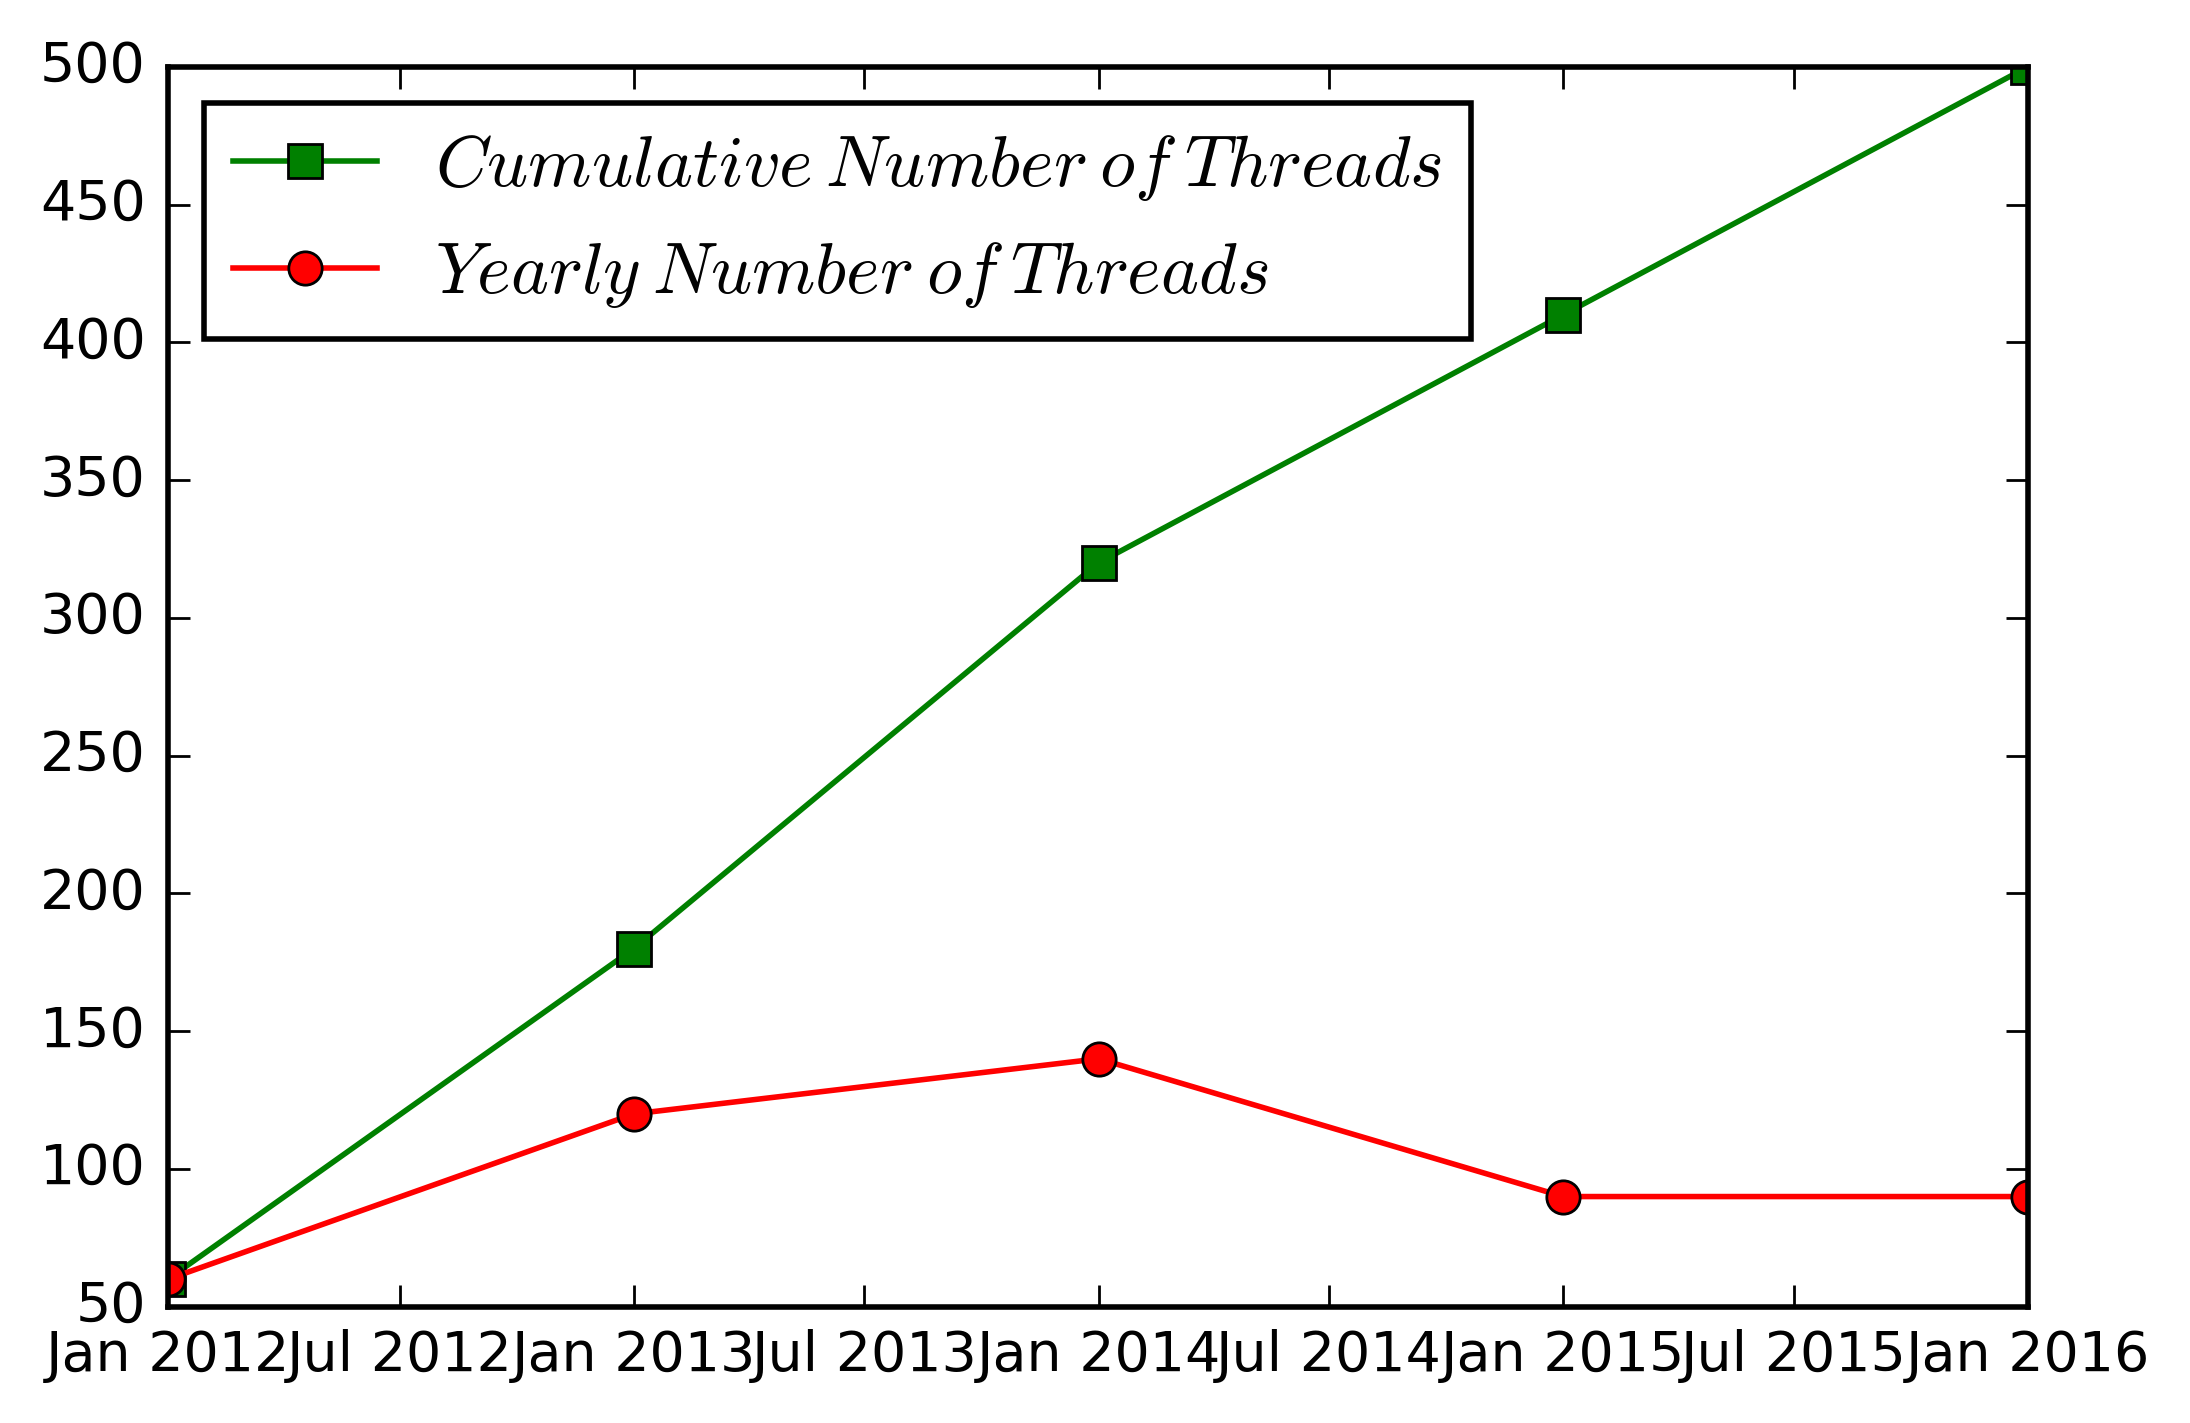

In [186]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

plt.plot(ds.date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')
plt.plot(dd.date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

## 据上表和上图，从2012年到2014年有关Facebook的发帖量呈上升趋势，在2014年达到顶峰，之后发帖量急剧下降

## 3.2 分析天涯所有Facebook相关回帖的点击率

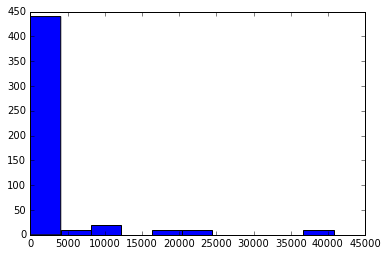

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data.click)
plt.show()

## 由上图可以看出，绝大部分帖子的点击率都在0-5000之间，极少数帖子点击率超过10000甚至达到30000多

In [187]:
dg = data.groupby('year').sum()
dgs = dg.cumsum()
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date
dg.date = getDate(dg)

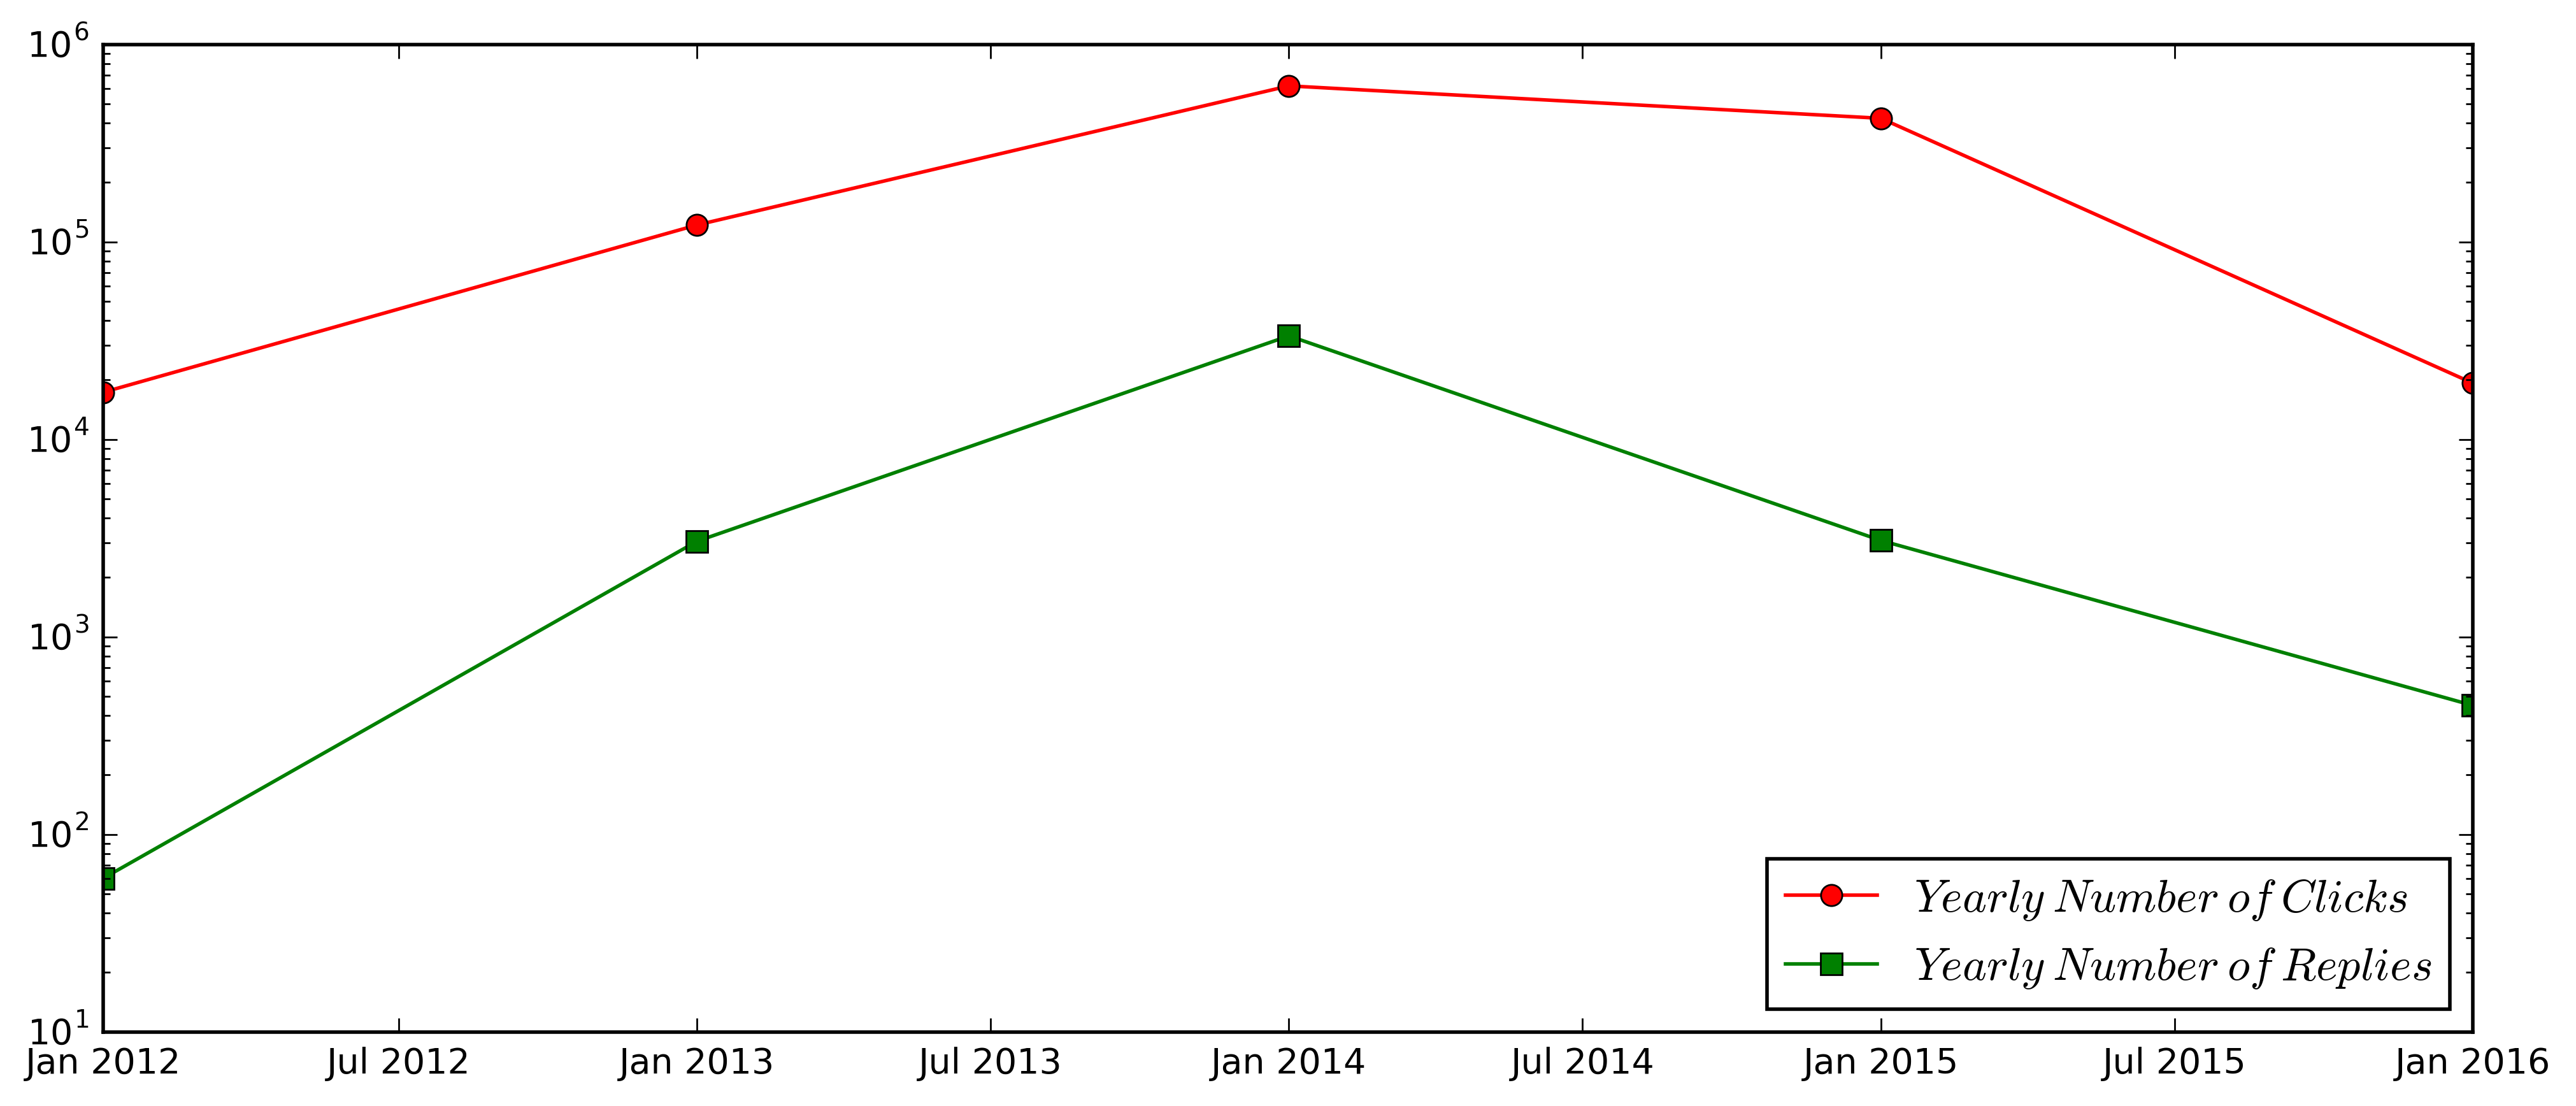

In [188]:
fig = plt.figure(figsize=(12,5))
plt.plot(dg.date, dg.click, 'r-o', label = '$Yearly\:Number\:of\:Clicks$')
plt.plot(dg.date, dg.reply, 'g-s', label = '$Yearly\:Number\:of\:Replies$')
plt.yscale('log')
plt.legend(loc=4,numpoints=1,fontsize=13)
plt.show()

## 由图可以看出，点击数与回复数呈现正相关趋势，其中点击数远远高于回复数。 2012年到2014年，两者呈同步上升趋势，年点击数与回复数在2014年达到峰值；从2014年开始，点击数和回复数都呈现下降趋势，点击数跌幅较小，回复数跌幅较大，说明用户尚且有较高的关注度，参与度有所降低；2015年开始，两者跌幅趋同，说明整体关注度也不断降低。

## 4.天涯Facebook主题贴文本分析

In [148]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
import pandas as pd
np.set_printoptions(precision=2)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

In [151]:
with open('/Users/zhangyixin/Desktop/facebook/facebook_threads_network.txt', 'r') as f:
    reports = f.readlines()

In [152]:
len(reports)

21620

In [2]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
matplotlib.rc("savefig", dpi=400)

## 添加停用词

In [9]:
filename = '/Users/zhangyixin/Desktop/facebook/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line.decode('utf8'), 0)
    stopwords[line.decode('utf8')] = 1
    line = f.readline().rstrip()
f.close()

In [6]:
with open('/Users/zhangyixin/Desktop/facebook/newdata_yearreply.txt', 'r') as f:
    reports1 = f.readlines()

## 4.1基于TDIDF算法的关键词抽取

In [11]:
# 试抽取2012年所有相关回复的关键词
import jieba.analyse
jieba.analyse.set_stop_words('/Users/zhangyixin/Desktop/facebook/stopwords.txt')
txt = reports1[0]
tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
tf = [i for i in tf if i not in stopwords] 
#seg_list= jieba.cut(txt, cut_all=False)
#seg_list = [i for i in seg_list if i in tf]
#txt200 = r' '.join(seg_list)
print u"、".join([i[0] for i in tf[:50]])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4j/_xvbslm10g75fm52jmnfcgd00000gn/T/jieba.cache
Loading model cost 0.605 seconds.
Prefix dict has been built succesfully.


HTML5、原生、色情网站、web、访问量、股价、限售、Twitter、iPad、用户、VPN、社交、朋友、分享、投资人、开发者、设置、股票、抛售、服务器、网络、招股、张庆祥、Xvideos、员工、美容、周二、医生、应用程序、下滑、带宽、公开、开发、获得成功、美元、印尼、新低、YouPorn、Hulu、Danny、game、Store、吸脂、公司股票、美容师、未置可否、流通股、格雷厄姆、法拉利、互联网


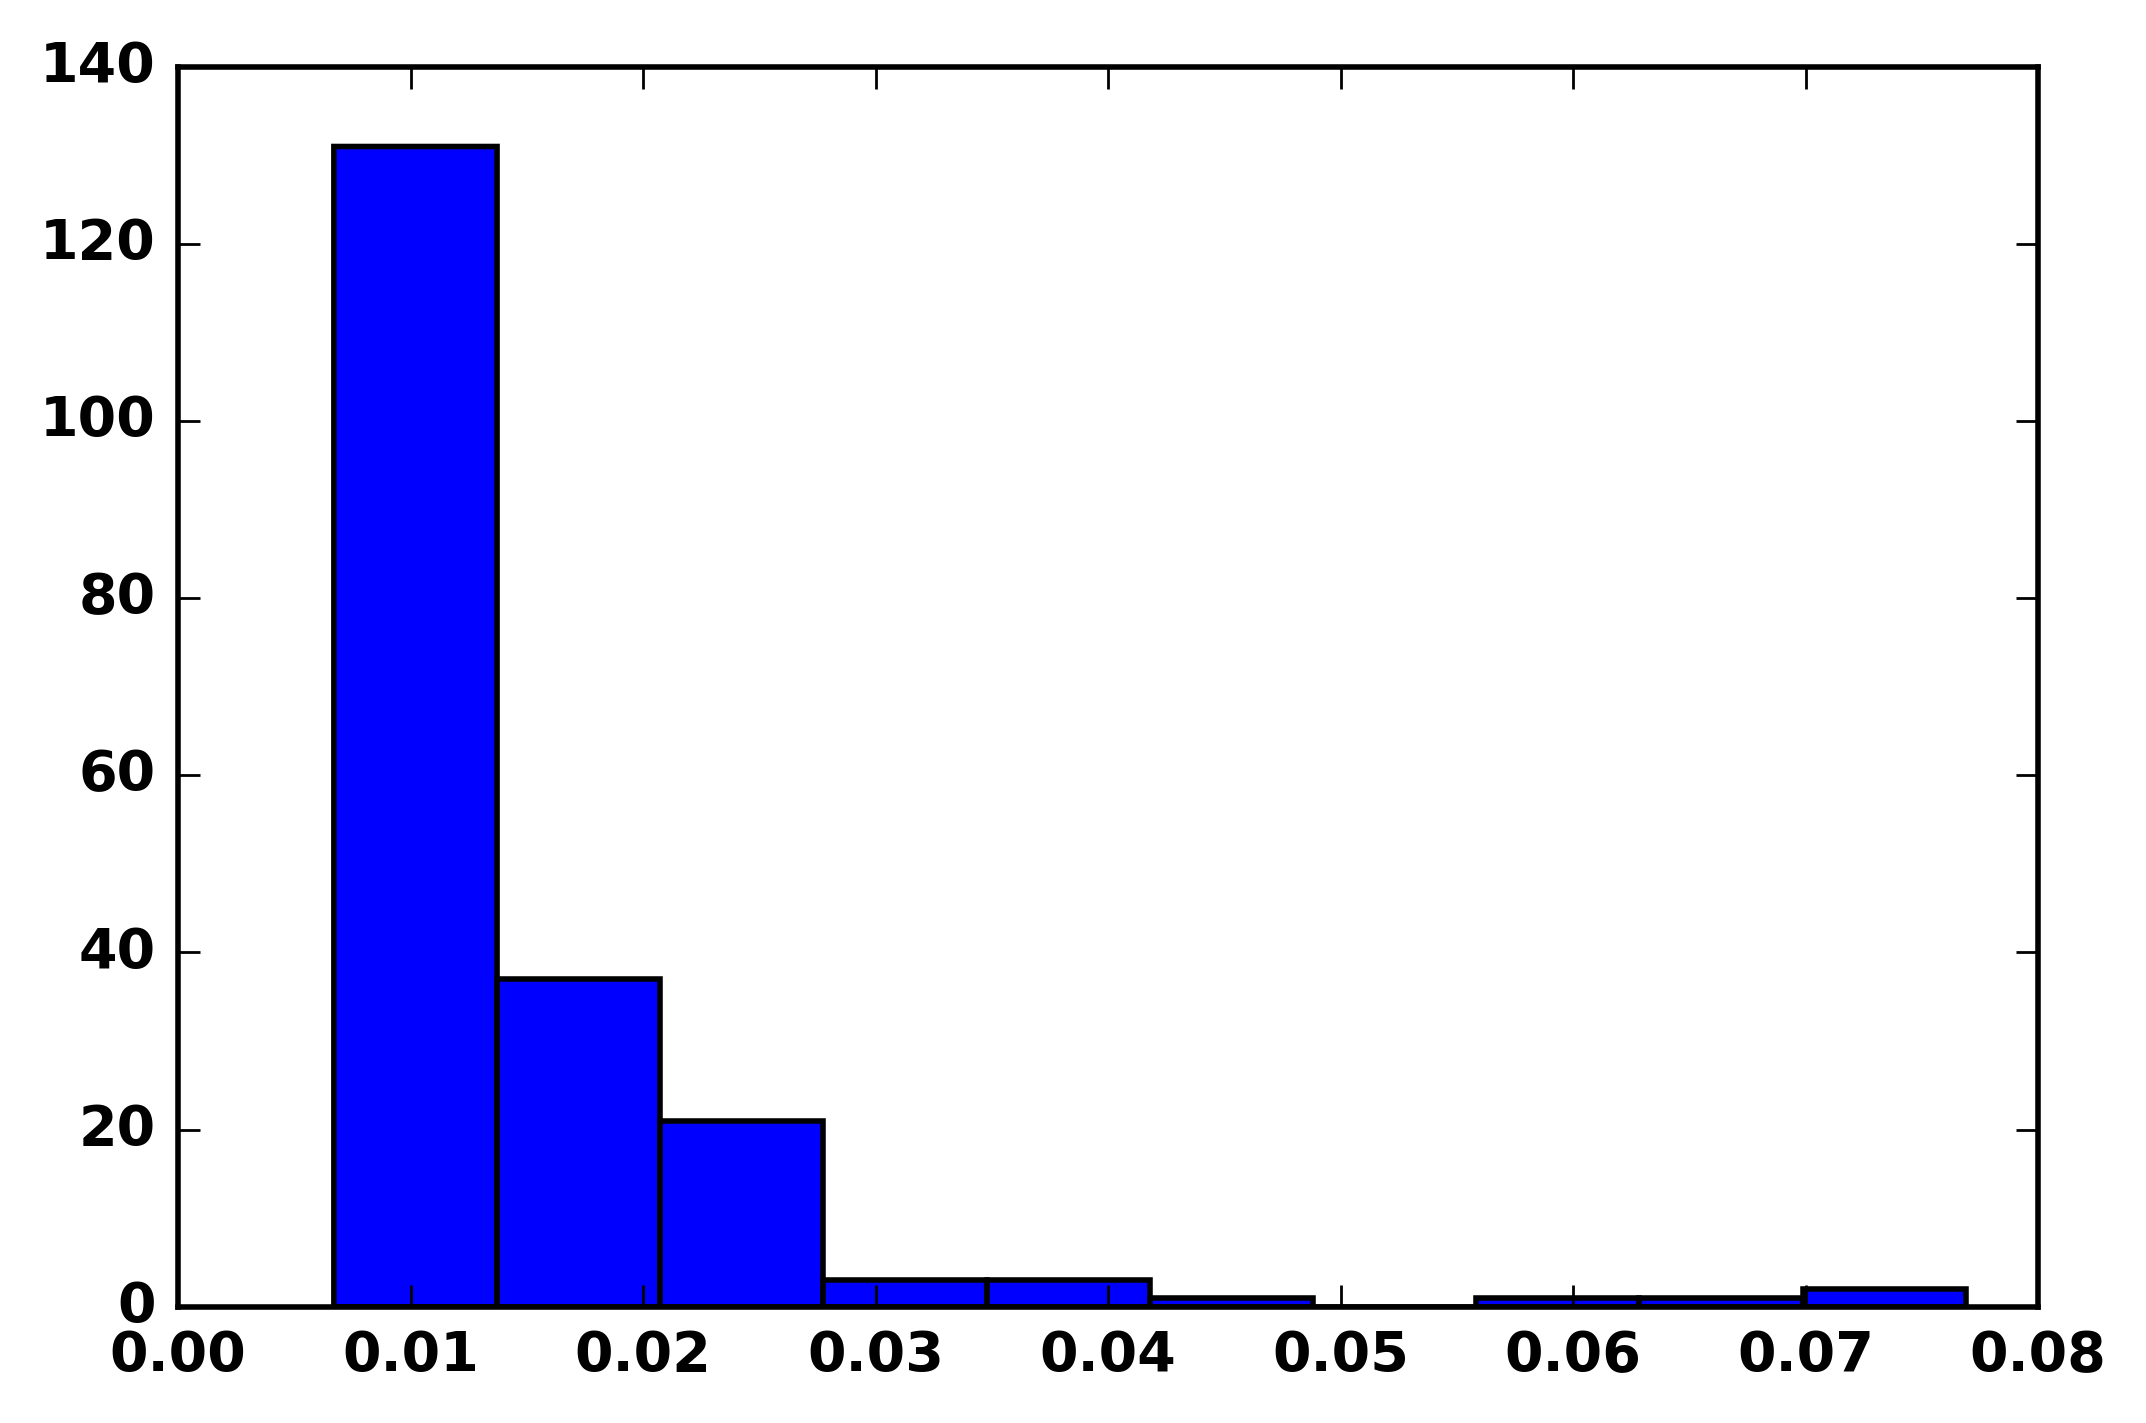

In [40]:
plt.hist([i[1] for i in tf])
plt.show()

## 4.2基于 TextRank 算法的关键词抽取

In [41]:
# 试抽取2012年所有相关回复的关键词
tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
print u"、".join([i[0] for i in tr[:50]])

美国、市场、硅谷、社会、发展、分享、软件、脸书、互联网、迪拜、文章、技术、行业、欧阳、政府、信息、社交、微信、全球、投资、朋友、注册、北京、分析、关注、世界、故事、服务、对话框、未婚夫、风险投资、网络、主页、生活、基金、用户、成立、关系、消息、福利、内容、女性、观点、创业者、老百姓、时间、卫报、事实、客户、陷入


## 4.3 结合Tf－idf和TextRank算法绘制12-16年关键词权重图

In [42]:
import pandas as pd
def keywords(index):
    txt = reports1[index]
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
    jieba.analyse.set_stop_words('/Users/zhangyixin/Desktop/facebook/stopwords.txt')
    trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i], 
                 fontsize = worddata.textrank[i]*15, color = 'red', rotation = 0,fontproperties=zhfont1)
    plt.title(txt[:4])
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
    plt.show()

In [43]:
# 解决matplotlib显示中文的问题
import matplotlib.pyplot as plt
import matplotlib
zhfont1 = matplotlib.font_manager.FontProperties(fname='/Users/zhangyixin/Desktop/facebook/huawenheiti.ttf')

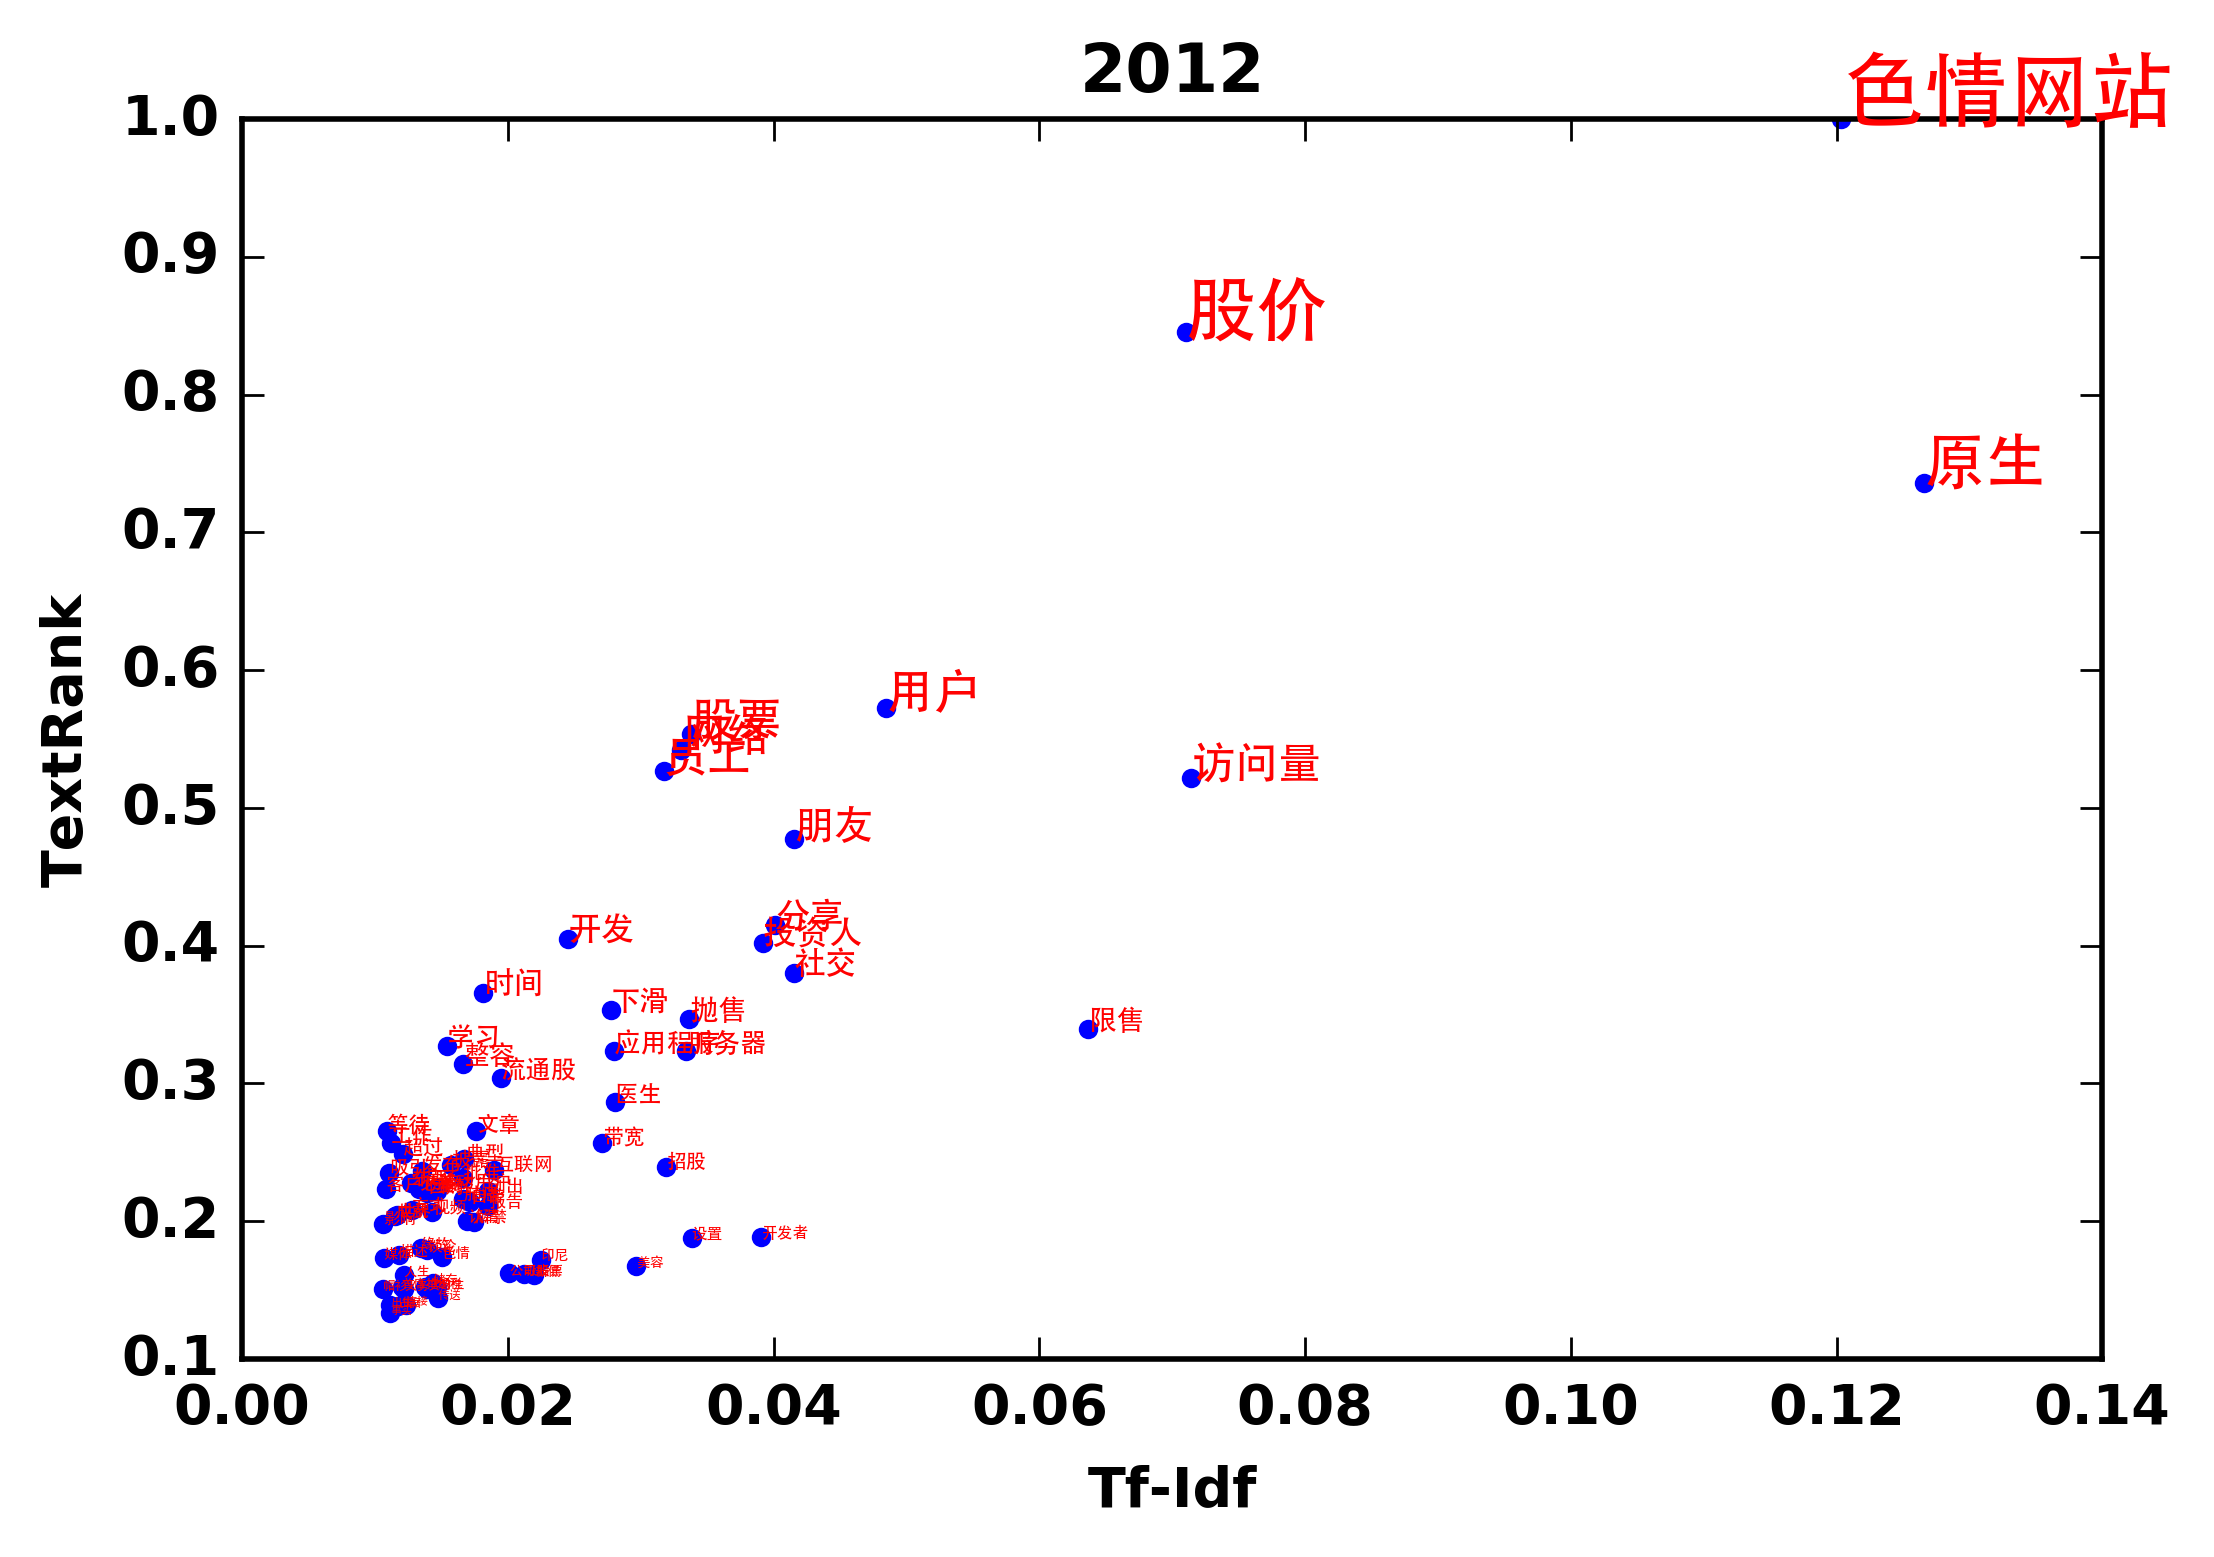

In [33]:
# 2012年关键词权重图
keywords(0)

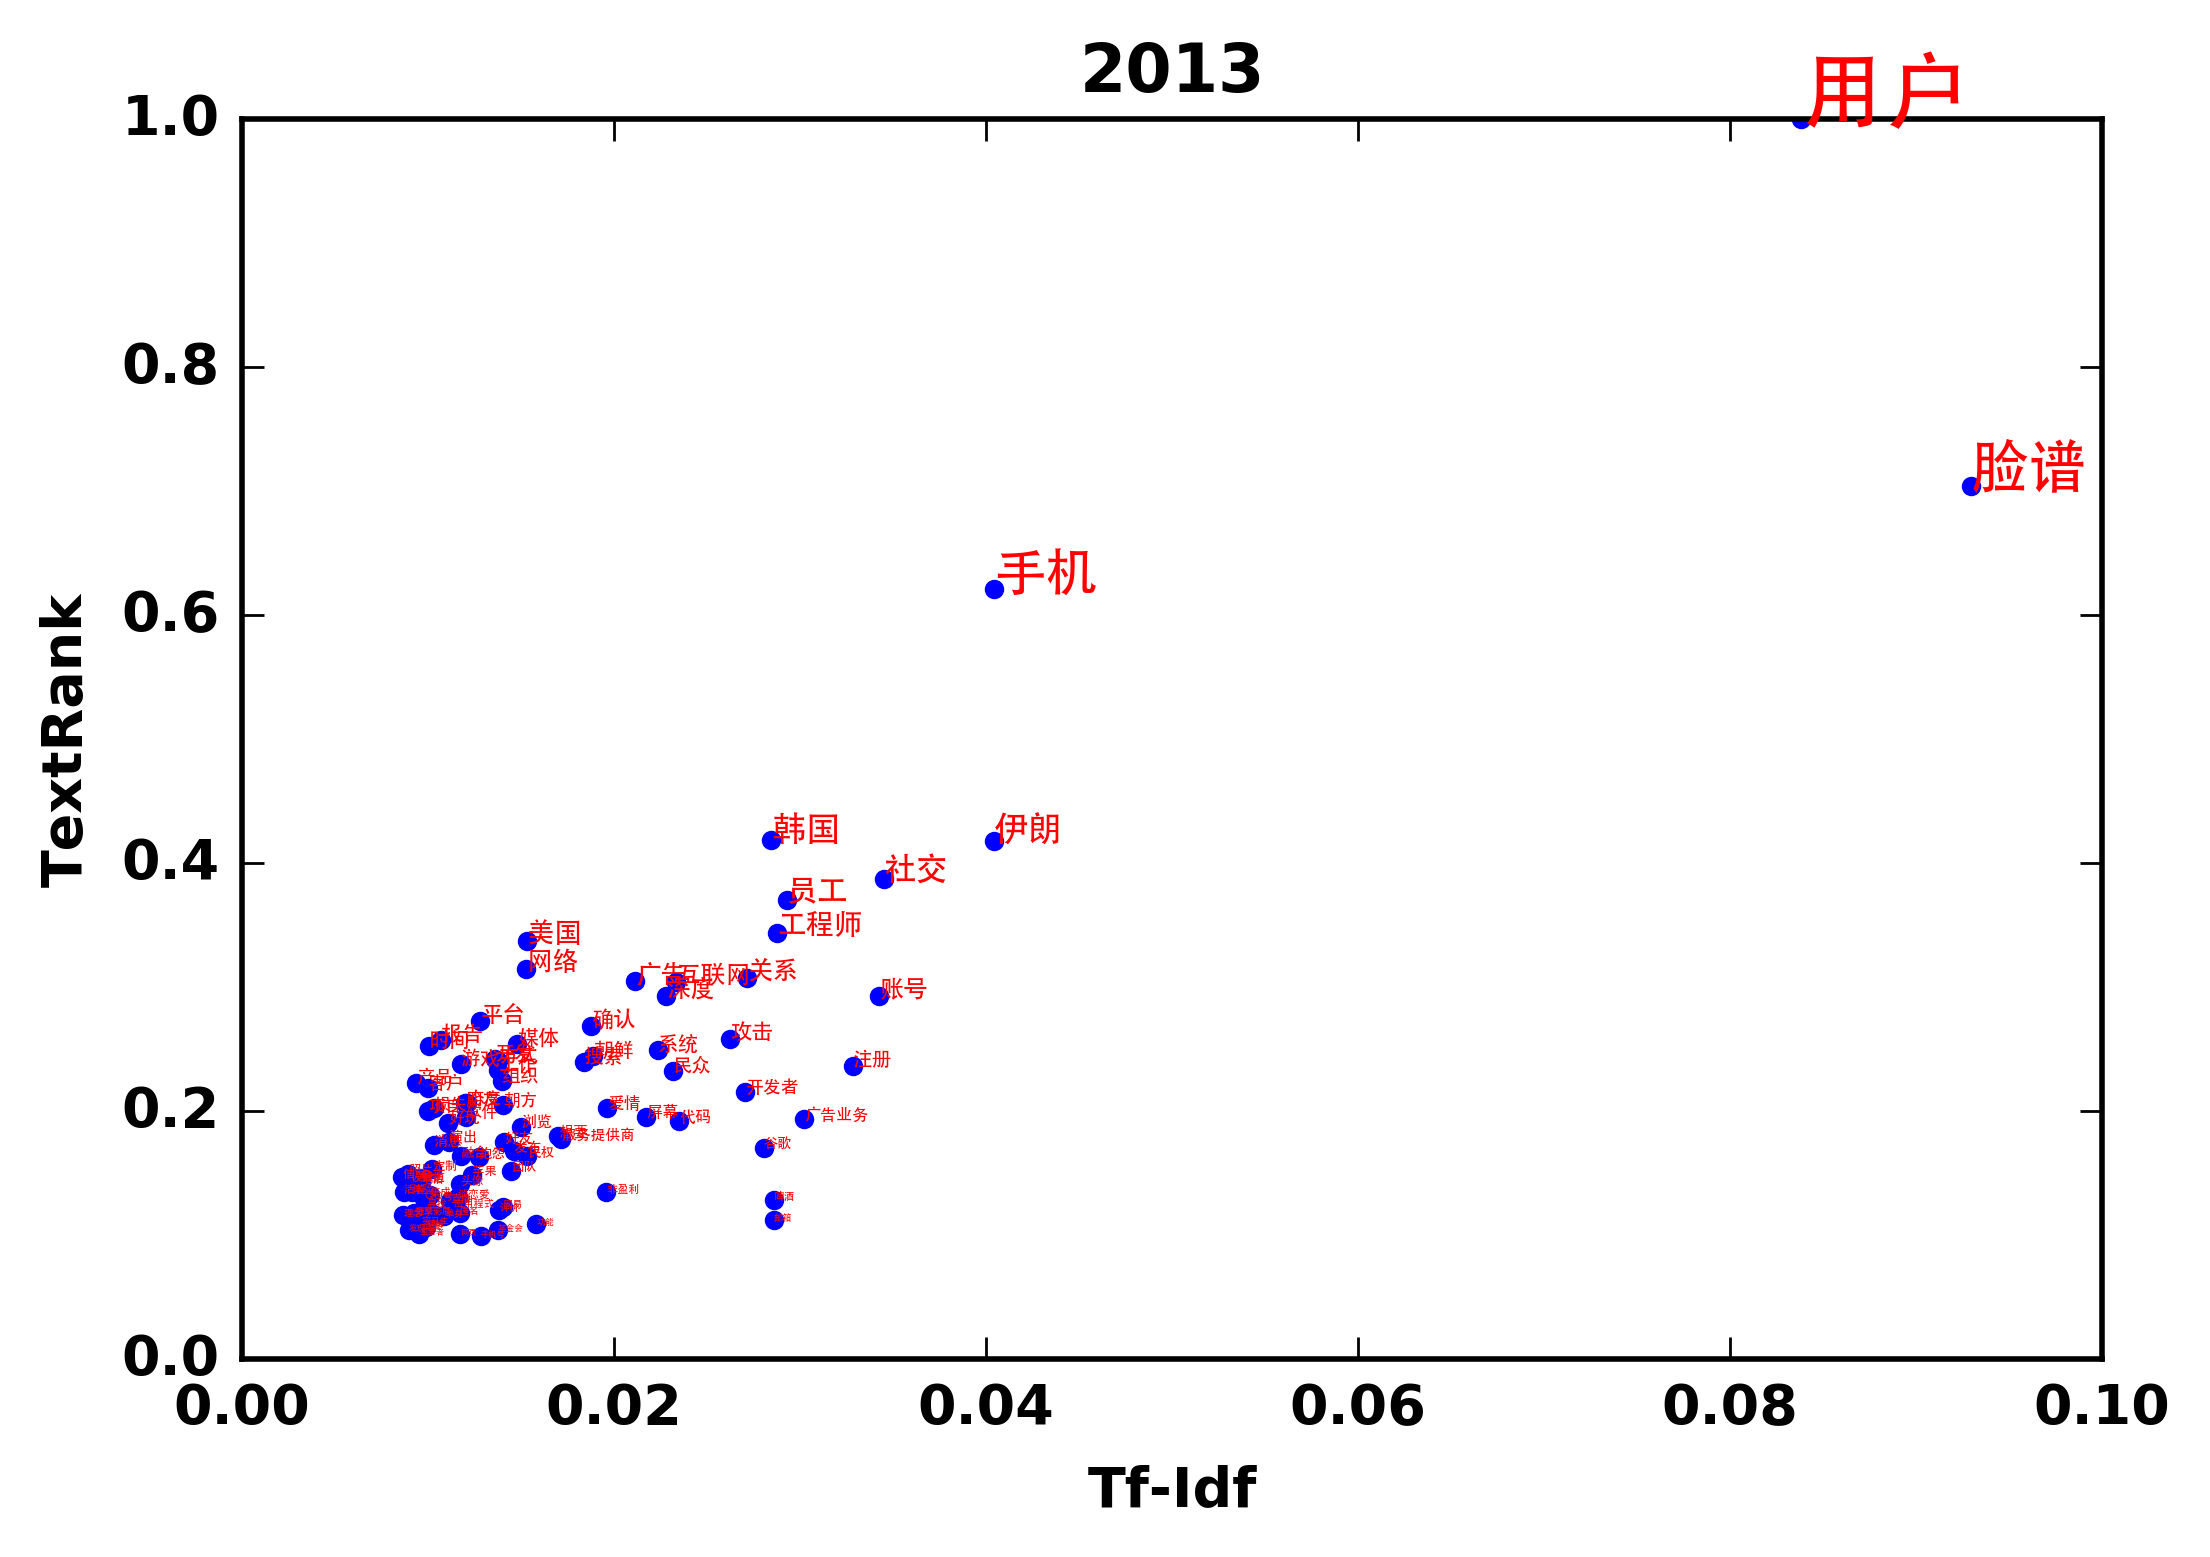

In [34]:
# 2013年关键词权重图
keywords(1)

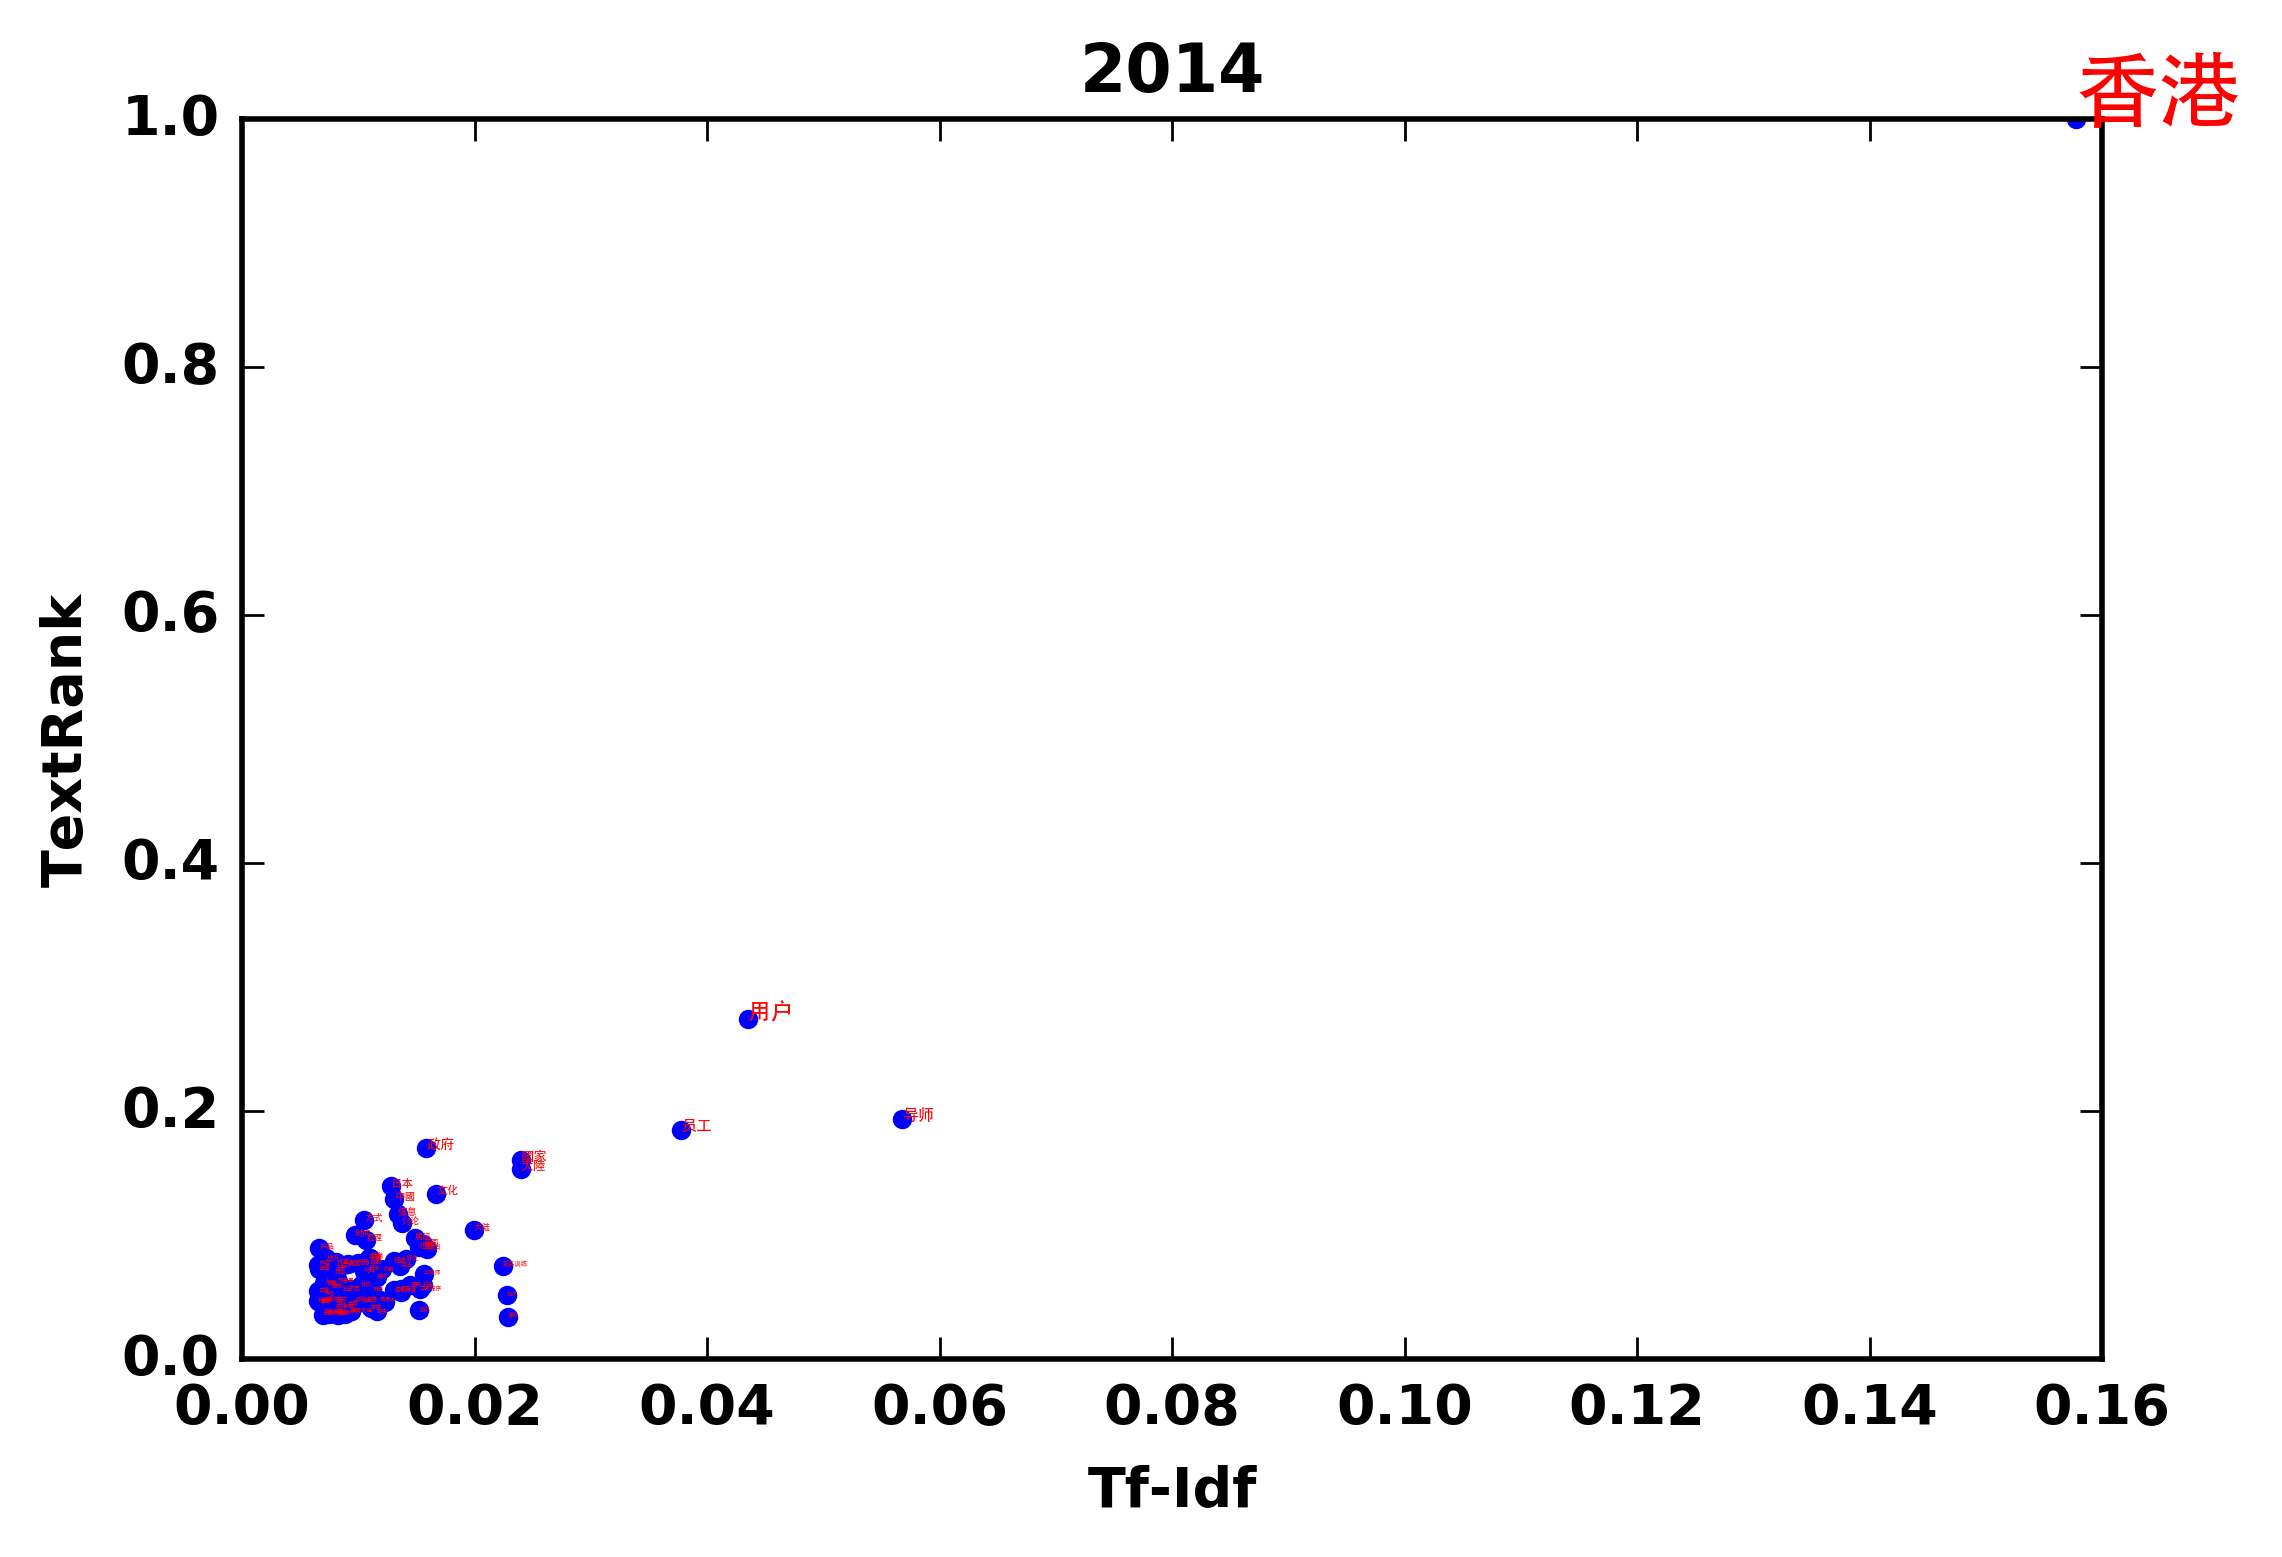

In [45]:
# 2014年关键词权重图
keywords(2)

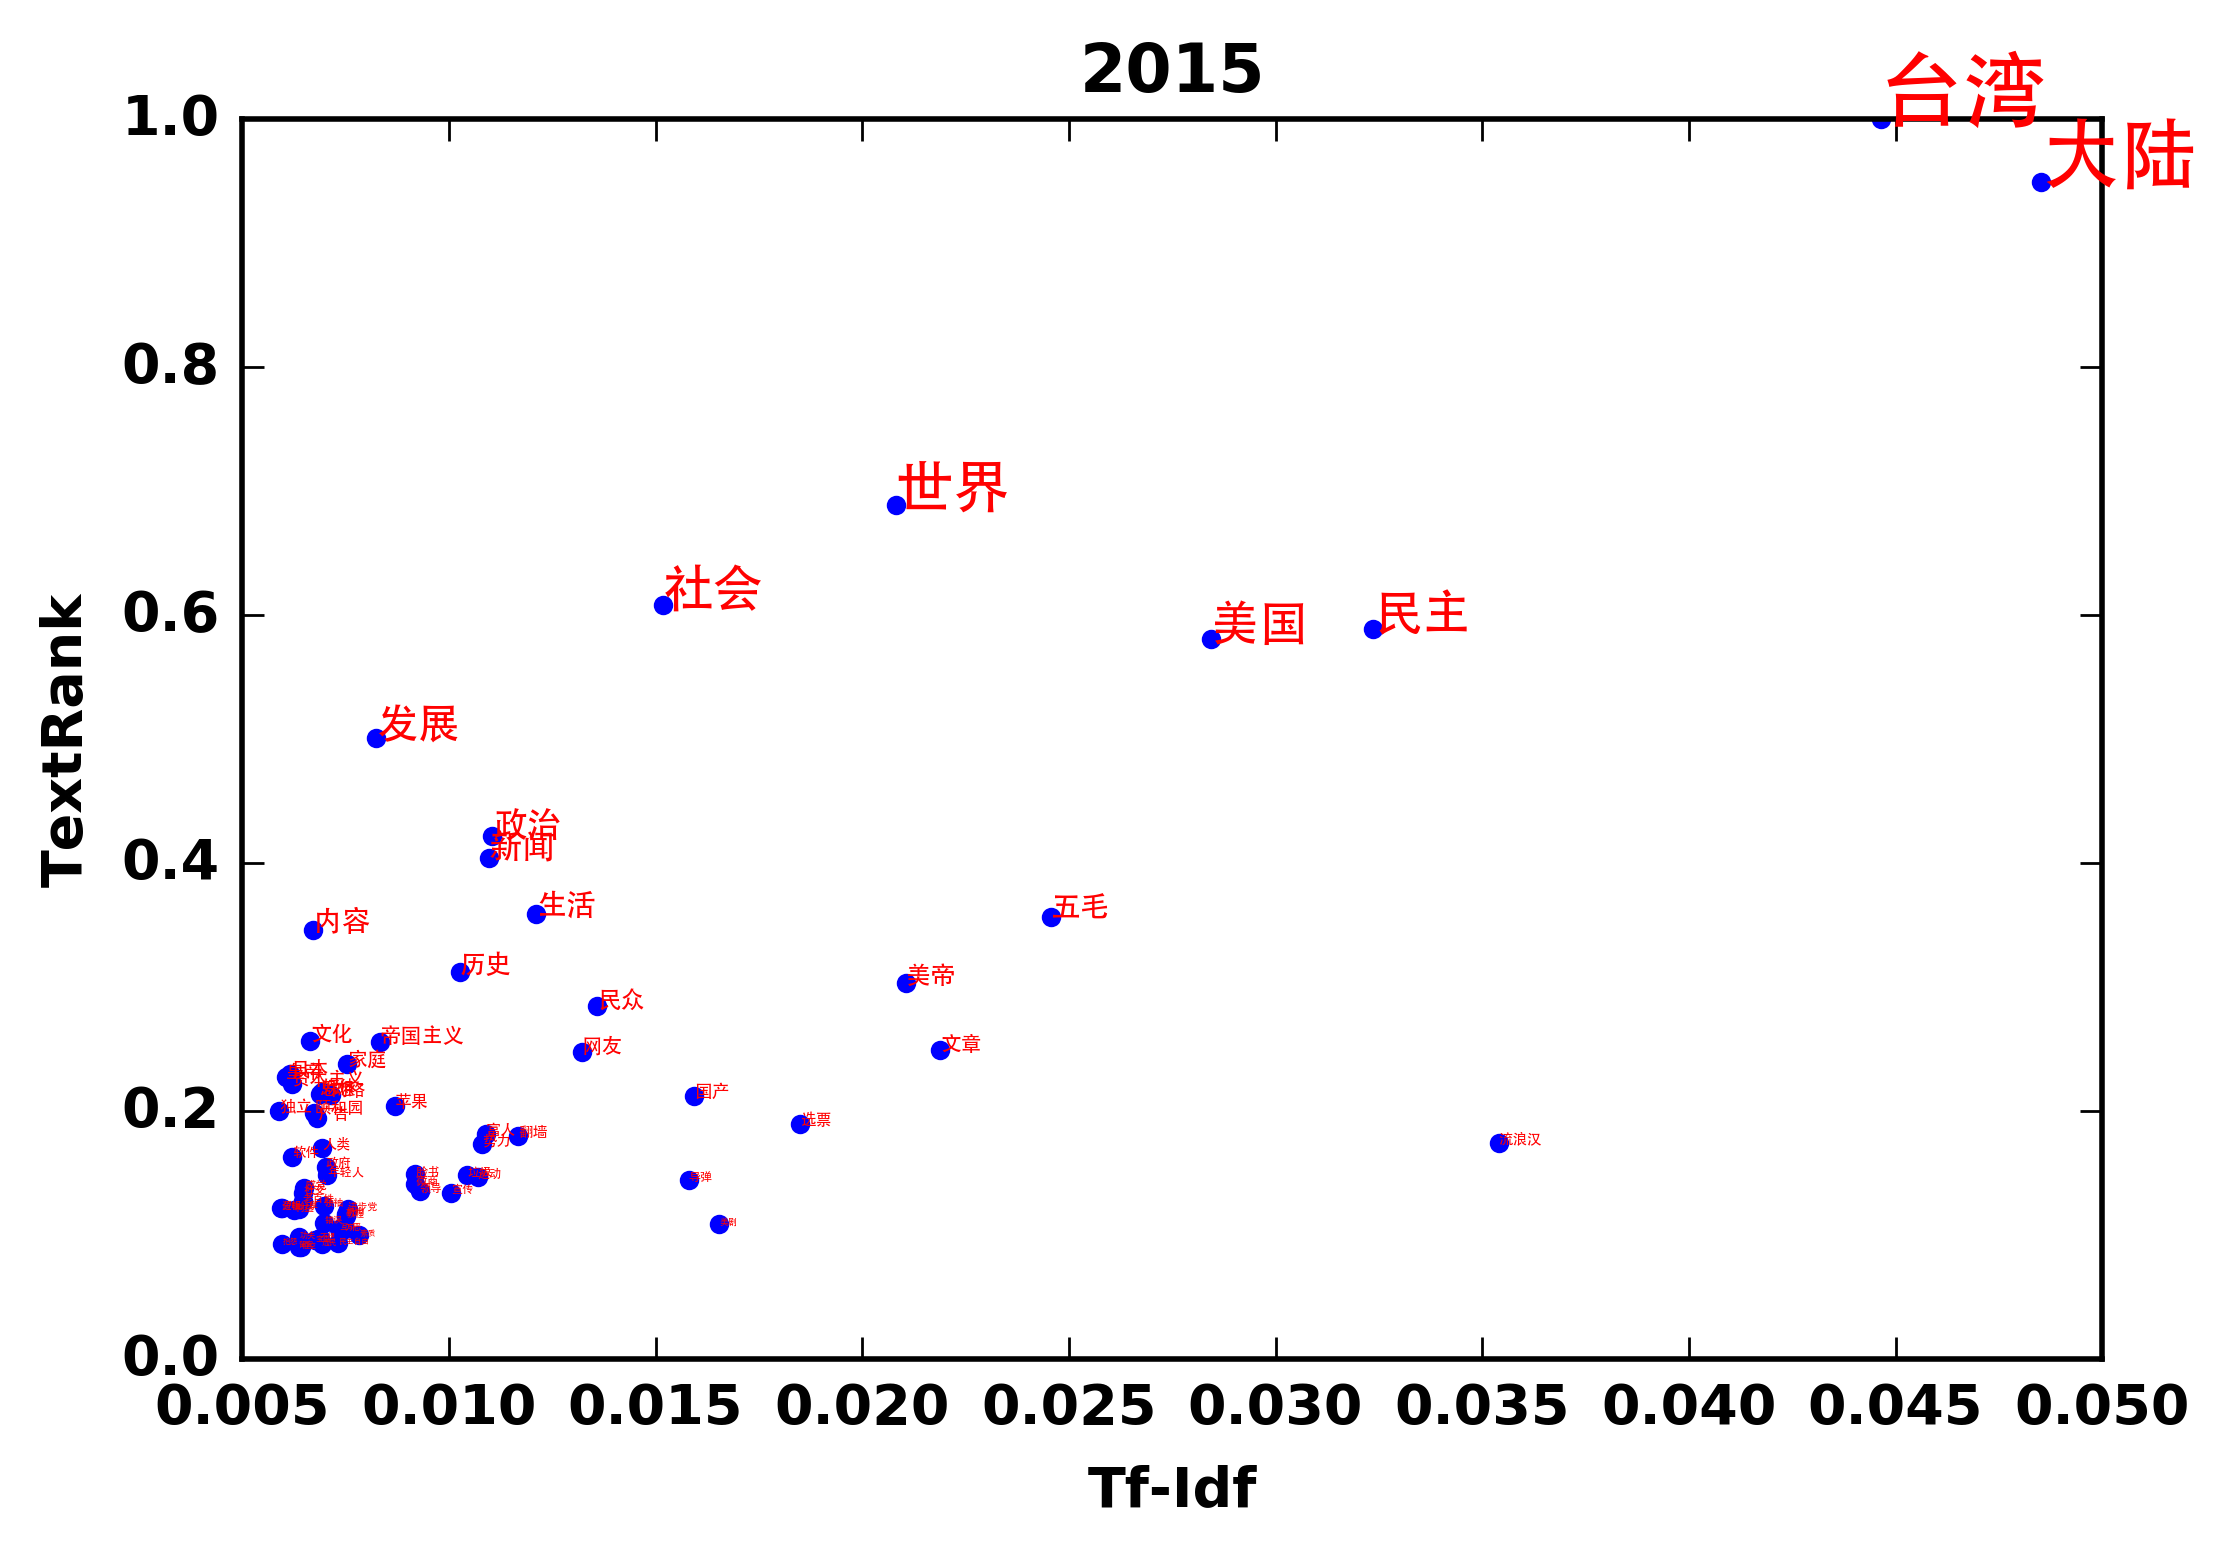

In [46]:
# 2015年关键词权重图
keywords(3)

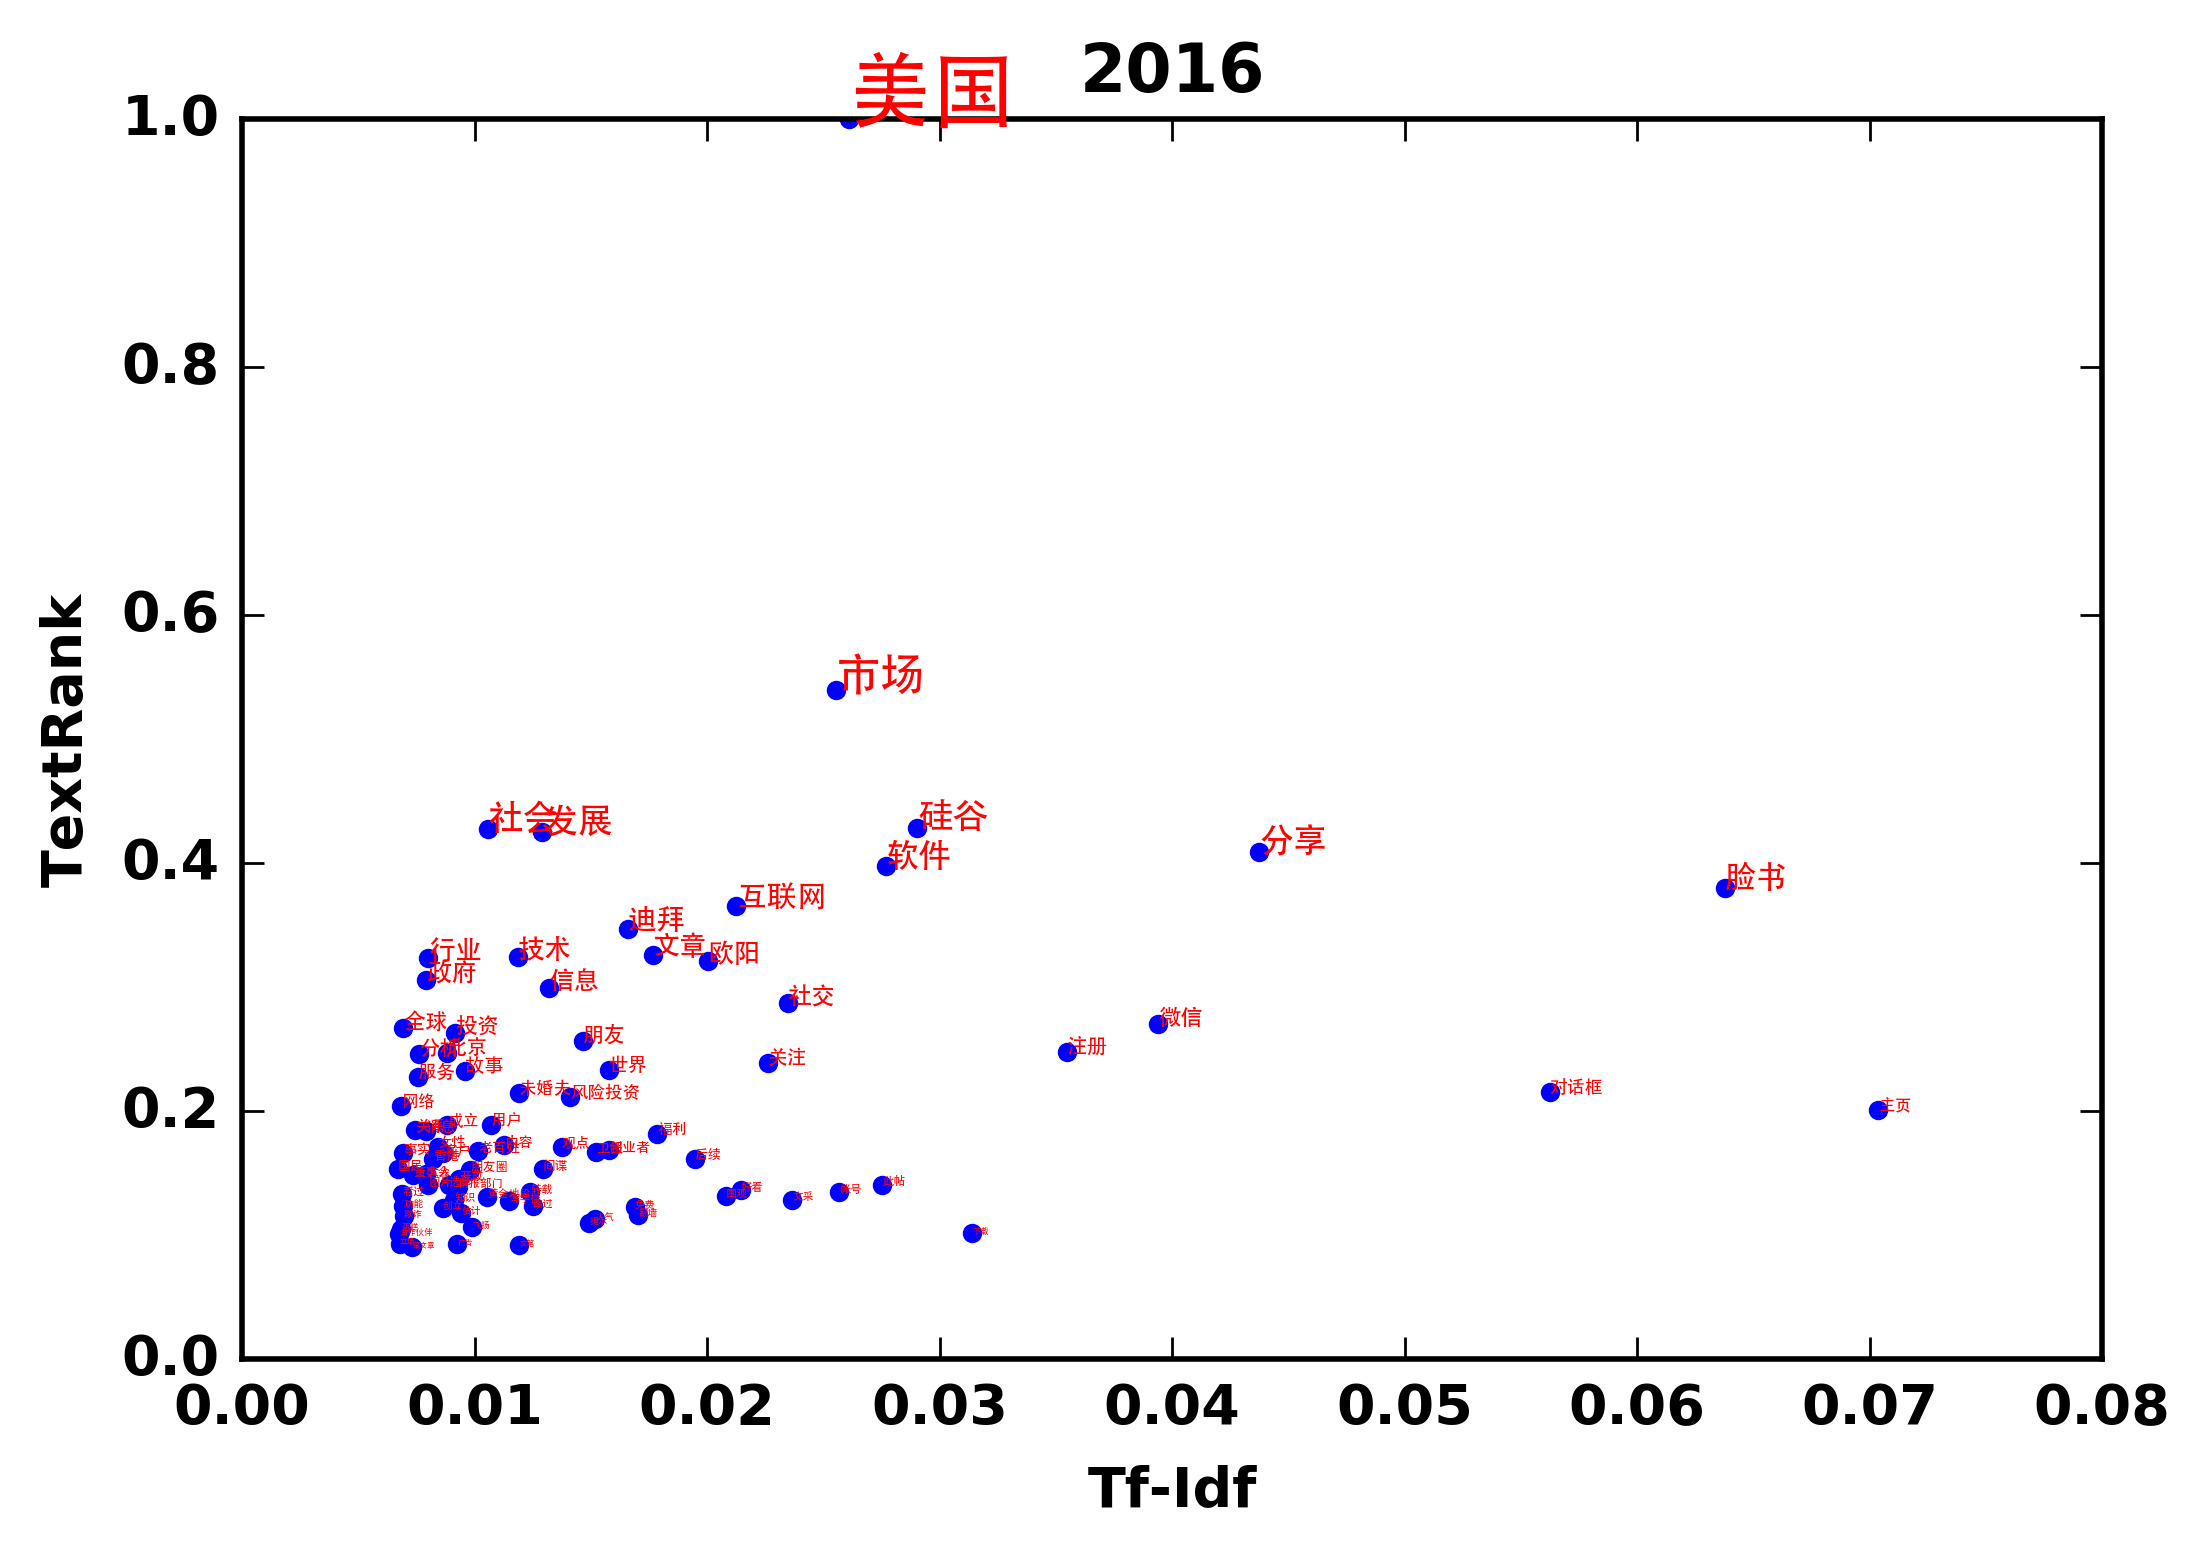

In [52]:
# 2016年关键词权重图
keywords(4)

## 由以上基于Tf-idf算法和TextRank算法绘制12-16年关键词权重图可以看出：
2012年权重大的关键词为：色情网站、股价、原生、用户、访问量。
2013年权重大的关键词为：用户、手机、脸谱。
2014年权重大的关键词为：香港。其他关键词占比较小。
2015年权重大的关键词为：台湾、大陆两个占比大且十分接近。民主、美国、世界、社会属于第二梯队。
2016年权重大的关键词为：美国。其他关键词占比较小。

## 4.4基于Tf－idf算法绘制12-16年相关回帖词云

In [101]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='/Users/zhangyixin/cjc2016/data/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    #plt.show()

In [102]:
import jieba.analyse
jieba.analyse.set_stop_words('/Users/zhangyixin/Desktop/facebook/stopwords.txt')
txt = reports1[0]
tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
tf = [i for i in tf if i not in stopwords] 

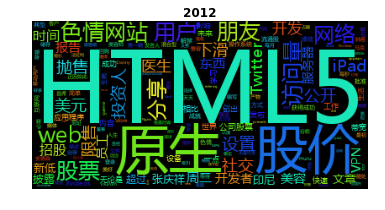

In [112]:
# 2012年词云
txt = reports1[0]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

## 由词云图可见，2012年的关键词前几位为：html5、色情网站、股价、原生、股票、朋友。

In [113]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
print u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

HTML5（180）、 原生（160）、 股价（140）、 色情网站（130）、 web（100）、 朋友（80）、 股票（80）、 用户（80）、 访问量（70）、 分享（60）、 网络（60）、 投资人（60）、 设置（60）、 限售（60）、 Twitter（60）、 抛售（50）、 公开（50）、 美元（50）、 iPad（50）、 社交（50）、 下滑（50）、 开发（50）、 医生（50）、 招股（50）、 时间（50）、 员工（50）、 周二（50）、 服务器（40）、 开发者（40）、 美容（40）、 报告（40）、 VPN（40）、 东西（30）、 文章（30）、 发布（30）、 张庆祥（30）、 新低（30）、 应用程序（30）、 披露（30）、 创出（30）、 超过（30）、 公司股票（30）、 印尼（30）、 成功（30）、 一点（30）、 设备（30）、 学习（30）、 无论是（30）、 内容（30）、 快速（30）、 工作（30）、 相比（30）、 世界（30）、 未来（30）、 Xvideos（30）、 生活（30）、 获得成功（30）、 带宽（30）、 简单（30）、 影响（30）、 典型（30）、 方式（30）、 解禁（30）、 批准（30）、 互联网（30）、 流通股（30）、 成就（20）、 操作系统（20）、 缘故（20）、 色情（20）、 正因如此（20）、 Hulu（20）、 回购（20）、 持股（20）、 出售（20）、 混合型（20）、 game（20）、 客户（20）、 美好（20）、 举措（20）、 编写（20）、 产物（20）、 描述（20）、 媒体（20）、 美容师（20）、 每秒（20）、 马克（20）、 自带（20）、 储存（20）、 每月（20）、 等待（20）、 谷歌（20）、 人生（20）、 架设（20）、 文件（20）、 地址（20）、 发言人（20）、 登录（20）、 整容（20）、 随处（20）、 安德森（20）、 第一辆（20）、 天天（20）、 移动用户（20）、 Store（20）、 最初（20）、 必需（20）、 YouPorn（20）、 实习生（20）、 好多（20）、 义务（20）、 视频（20）、 肺癌（20）、 法拉利（20）、 演讲（20）、 远远（20）、 占据（20）、 懂

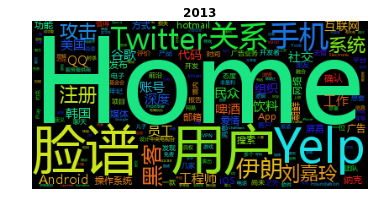

In [110]:
# 2013年词云
txt = reports1[1]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

## 由词云图可见，2013年的关键词前几位为：Home、脸谱、用户、twitter、伊朗。

In [111]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
print u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

Home（420）、 用户（300）、 脸谱（240）、 Yelp（190）、 手机（160）、 Twitter（160）、 关系（140）、 伊朗（130）、 黑客（120）、 刘嘉玲（110）、 系统（110）、 注册（110）、 攻击（100）、 Android（100）、 员工（100）、 韩国（100）、 账号（90）、 工程师（90）、 啤酒（90）、 美国（90）、 饮料（90）、 社交（90）、 工作（80）、 深度（80）、 谷歌（80）、 QQ（80）、 民众（80）、 代码（80）、 互联网（80）、 操作系统（70）、 纳克（70）、 确认（70）、 方式（70）、 功能（70）、 App（70）、 爱情（70）、 发布（70）、 朝鲜（70）、 邮箱（70）、 组织（70）、 广告（70）、 hotmail（60）、 iOS（60）、 网络（60）、 搜索（60）、 开发者（60）、 开发（60）、 屏幕（60）、 一款（60）、 境内（60）、 广告业务（60）、 媒体（60）、 时间（60）、 想要（60）、 态度（50）、 平台（50）、 发现（50）、 朋友（50）、 评价（50）、 聊天（50）、 项目（50）、 报告（50）、 年纪（50）、 消息（50）、 产品（50）、 一位（50）、 主管（50）、 尚未（50）、 团队（50）、 电子（40）、 几家（40）、 前沿（40）、 Foundation（40）、 York（40）、 客户（40）、 服务提供商（40）、 Jillian（40）、 损失（40）、 电话（40）、 说道（40）、 设计（40）、 免费（40）、 网易（40）、 游戏（40）、 Frontier（40）、 基金会（40）、 多个（40）、 中央电视台（40）、 报道（40）、 信息（40）、 Play（40）、 之外（40）、 非盈利（40）、 幸福（40）、 逻辑（40）、 约克（40）、 16（40）、 浏览（40）、 融合（40）、 理解（40）、 软件（40）、 Electronic（40）、 封杀（40）、 定义（40）、 儿子（40）、 民权（40）、 值得（40）、 VPN（40）、 演出（40）、 苹果（40）、 寻找（40）、 Google（40）、 登陆（40）、 抱怨（40）、

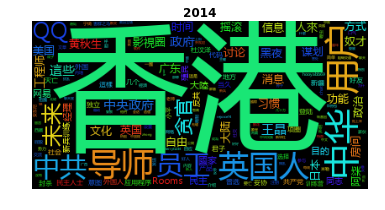

In [108]:
# 2014年词云
txt = reports1[2]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

## 由词云图可见，2014年的关键词前几位为：香港、用户、中华、英国人、导师。

In [109]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
print u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

香港（1490）、 19（660）、 中华（410）、 17（410）、 用户（350）、 导师（350）、 48（330）、 英国人（320）、 员工（290）、 中共（260）、 未来（240）、 QQ（230）、 贪官（210）、 中央政府（190）、 政府（190）、 59（190）、 00（190）、 這些（190）、 王晶（190）、 人來（180）、 文化（180）、 大陆（180）、 影視圈（180）、 政治（170）、 黄秋生（170）、 英国（170）、 奴才（170）、 28（160）、 习惯（160）、 谋划（150）、 25.0（150）、 16（150）、 信息（140）、 摇滚（140）、 黑夜（140）、 日本（140）、 自由（130）、 23（130）、 时间（130）、 42（130）、 房间（120）、 广东（120）、 功能（120）、 消息（120）、 讨论（120）、 美国（120）、 方式（120）、 阿柒（110）、 民主（110）、 國家（110）、 大陸（110）、 工程师（110）、 目的（110）、 Rooms（110）、 外国人（100）、 网易（100）、 经理（100）、 同志（100）、 新兵训练（100）、 殖民（100）、 反共（100）、 地方（90）、 新疆（90）、 這樣（90）、 39（90）、 共产党（90）、 封杀（90）、 几个（90）、 民主人士（90）、 好友（90）、 杜汶泽（80）、 当久（80）、 意图（80）、 应用程序（80）、 07（80）、 项圈（80）、 产品（80）、 妥协（80）、 独立（80）、 外国（80）、 登陆（80）、 灭亡（80）、 社会（80）、 普选（80）、 君子（80）、 代码（80）、 选择（70）、 hooyabb69（70）、 58（70）、 网络（70）、 西藏（70）、 家伙（70）、 参与（70）、 脸书（70）、 兩制（70）、 设置（70）、 势力（70）、 31（70）、 内容（70）、 训练营（70）、 一國（70）、 小平（70）、 這是（70）、 蝗虫（70）、 米勒（70）、 介绍（70）、 祖國（70）、 回应（70）、 交流（70）、 简单（70）、 宁做（60）、 經濟（60）、 文章（60）、 内地（60）

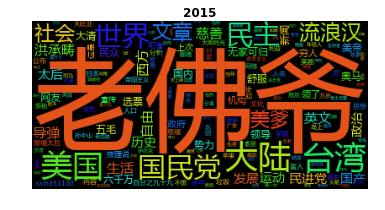

In [106]:
# 2015年词云
txt = reports1[3]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

## 由词云图可见，2015年的关键词前几位为：老佛爷、大陆、美国、台湾、国民党、民主。

In [107]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
print u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

老佛爷（1330）、 大陆（1040）、 台湾（930）、 美国（890）、 国民党（700）、 民主（620）、 世界（620）、 流浪汉（490）、 社会（440）、 文章（430）、 美爹（400）、 洪承畴（370）、 慈善（350）、 16（350）、 自由（340）、 生活（340）、 23（330）、 西方（320）、 导弹（320）、 英文（310）、 00（300）、 发展（300）、 民进党（290）、 历史（290）、 政治（280）、 太后（280）、 国产（270）、 运动（270）、 无家可归（260）、 五毛（260）、 选票（260）、 网友（260）、 六千万（250）、 美帝（250）、 民众（250）、 国内（240）、 新闻（240）、 奥马（240）、 01（240）、 领导（230）、 大清（220）、 势力（220）、 机构（210）、 舒服（210）、 穷人（200）、 政府（200）、 领了（200）、 上次（200）、 可惜（200）、 宣传（200）、 按理说（200）、 公布（200）、 这是（200）、 百分之九十九（200）、 ssih351100（200）、 08（190）、 多年（180）、 美剧（180）、 百年（180）、 慈禧太后（170）、 富人（170）、 家庭（170）、 内容（170）、 垃圾（170）、 文化（170）、 人口（170）、 慈禧（160）、 思想（160）、 分析（160）、 日本（160）、 人类（160）、 帝国主义（150）、 媒体（150）、 网络（150）、 不想（150）、 岛上（150）、 苹果（150）、 感觉（150）、 19（150）、 大明（140）、 国外（140）、 09（140）、 31（140）、 炮灰（140）、 错误（140）、 万岁（140）、 独立（140）、 48（140）、 翻墙（140）、 皇帝（140）、 利益（140）、 死光（140）、 利比亚（130）、 孙中山（130）、 素质（130）、 当年（130）、 领袖（130）、 老百姓（130）、 年轻人（130）、 SB（130）、 司马（130）、 资本主义（130）、 免费（120）、 广告（120）、 伊拉克（120）、 两岸（120）、 奴隶（120）、 往事（

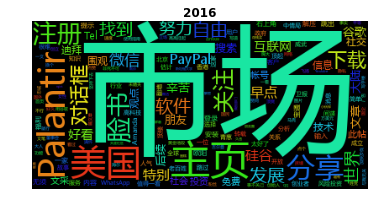

In [103]:
# 2016年词云
txt = reports1[4]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

## 由词云图可见，2016年的关键词前几位为：市场、主页、美国、分享、Palantir。

In [104]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
print u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

市场（490）、 主页（420）、 Palantir（410）、 美国（400）、 分享（370）、 脸书（340）、 注册（310）、 关注（300）、 对话框（280）、 下载（280）、 软件（240）、 自由（230）、 发展（230）、 世界（230）、 找到（220）、 努力（220）、 微信（210）、 PayPal（200）、 特别（190）、 硅谷（190）、 早点（190）、 互联网（190）、 好看（180）、 辛苦（180）、 文章（170）、 谷歌（170）、 大陆（170）、 后续（170）、 Tel（160）、 搜索（160）、 社交（160）、 朋友（160）、 技术（160）、 信息（160）、 迪拜（160）、 围观（150）、 观点（150）、 文采（150）、 社会（150）、 此帖（150）、 投资（150）、 免费（150）、 帐号（150）、 右上角（140）、 安装（140）、 提示（140）、 欧阳（140）、 输入（140）、 福利（140）、 Amanda（140）、 跳出（140）、 登录（140）、 内容（140）、 解压（140）、 一家（140）、 宝通（140）、 无须（140）、 这家（130）、 人气（130）、 北京（120）、 中情局（120）、 顶楼（120）、 选择（110）、 政府（110）、 创业者（110）、 成立（110）、 顶起（110）、 一位（110）、 行业（110）、 很难（100）、 估计（100）、 关系（100）、 路过（100）、 值得一看（100）、 高科技（100）、 太好了（100）、 风险投资（100）、 消息（100）、 分析（100）、 故事（100）、 用户（100）、 老百姓（100）、 转载（100）、 翻墙（100）、 卫报（90）、 全球（90）、 开放（90）、 服务（90）、 客户（90）、 WhatsApp（90）、 香港（90）、 间谍（90）、 青葱（90）、 17（90）、 威武（90）、 知识（90）、 简单（90）、 事不关己（80）、 25（80）、 大人（80）、 创立（80）、 忠诚（80）、 非死不可（80）、 女性（80）、 功能（80）、 平等（80）、 高高挂起（80）、 图片（80）、 速度（80）、 换个（80

## 4.5 关键词时间序列分析

In [97]:
import jieba.analyse
wordset = []
for txt in reports1:
    top20= jieba.analyse.textrank(txt, topK=200, withWeight=False)
    for w in top20:
        if w not in wordset:
            wordset.append(w)

In [98]:
len(wordset)

748

In [12]:
print ' '.join(wordset)[:2000]

色情网站 股价 原生 用户 股票 网络 员工 访问量 朋友 分享 开发 投资人 社交 时间 下滑 抛售 限售 学习 服务器 应用程序 整容 流通股 医生 等待 文章 工作 带宽 超过 典型 行业 披露 招股 互联网 发布 吸引 批准 趣事 提交 东西 确信 移动用户 内容 必需 客户 判语 圣经 创出 回购 隆胸 肺癌 自带 报告 市场 方式 视频 世界 成就 交换机 背板 认清 解禁 分析师 影响 旗下 来源 委员会 屌丝 发售 开发者 设置 上市 体育节目 保证 同事 交流 英雄 发出 发展 缘故 谈论 化疗 服务商 名人 描述 色情 媒体 印尼 有钱人 富人 美容 天气 政治家 分析 预期 硬件 等来 依赖于 公司股票 吸脂 新加坡 高度 新低 人生 远超过 美国 放上 图片 密码 办法 填好 显示 储存 像是 信息 垃圾 时段 打开 首席 建议 结出 赞同 症结所在 黄色 适应性 纳税 查看 来临 连续性 背景 牛仔裤 寻找 大会 日志 期权 发现 眼科 面临 抱怨 只能 联合 客服 执行官 小时 意味着 消亡 代理 帽衫 执行 开心 追求 投资 关键字 医学 义务 实习生 惨败 土地 死亡 主人 全员 时代 社会 竞争 咨询 创始人 受限 打消 单位 生成 女人 桌面 企博网 感悟 足够 网页 积累 步骤 减少 播放 眼皮 传送 上涨 团队 运作 手术 购物 电视网 通用 月份 连接 出售 占据 公司员工 原文 计划 默认 逆转 机架 崩溃 事实 脸谱 手机 韩国 伊朗 工程师 关系 广告 深度 账号 平台 确认 攻击 系统 朝鲜 搜索 游戏 注册 民众 组织 产品 态度 朝方 损失 爱情 项目 利用 屏幕 软件 广告业务 代码 好玩 浏览 宣传 想要 服务提供商 情况 演出 好友 照顾 消息 经典 谷歌 融合 民权 公布 资金 商业 定制 照片 苹果 电子 设计 报道 评论 电话 可能性 担心 头像 页面 阅读 好像 首演 活着 体验 非盈利 办公室 事物 集成 能量 身体 谈恋爱 男人 社交活动 锁定 升级 幽默感 QQ号 啤酒 直播 养生 身走 整理 避税 出席 带来 自动 生活 矮子 应用程式 网易 避孕 人类 启动 视为 评价 澳门 透露 新闻 旅游 试图 休闲 包括 匿名 妈妈 知名 影展 理念 工具 坟墓 单身 客厅 代表 天下网 程式 告诉

In [99]:
from collections import defaultdict

data = defaultdict(dict)
years = [int(i[:4]) for i in reports1]
for i in wordset:
    for year in years:
        data[i][year] = 0

In [36]:
for txt in reports1:
    year = int(txt[:4])
    top1000= jieba.analyse.textrank(txt, topK=1000, withWeight=True)
    for ww in top1000:
        word, weight = ww
        if word in wordset:
            data[word][year]+= weight

In [100]:
import numpy as np
word_weight = []
for i in data:
    word_weight.append([i, np.sum(data[i].values())])

In [101]:
word_weight.sort(key= lambda x:x[1], reverse = True )
top60 = [i[0] for i in word_weight[:60]]
print ' '.join(top60) 

原生 回望 恒空 咨询 发售 發展 公号 确信 剧情 投降 人生 服务器 团队 开放 沒有 结出 财产 服务 专制 大人 缺乏 篇文章 表面 感兴趣 生活习惯 关系 能比 应付 态度 微信 世纪 平台 阻碍交通 西藏 披露 关注 香港电影 页面 监狱 办公室 主页 事物 首席 权力 眼皮 官员 公司股票 赞同 背板 原文 意味着 症结所在 免费 煽动 跟着 降清 棒子 搞乱 国民 技术


In [102]:
from collections import OrderedDict
def plotEvolution(word, color, linestyle, marker):
    cx = data[word]
    cx = OrderedDict(sorted(cx.iteritems(), key=lambda x : x[0], reverse=False))
    print cx
    plt.plot( cx.keys(),cx.values(), color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=8)
    plt.ylabel(u'词语重要性',fontproperties=zhfont1)
    plt.xticks(range(min(cx.keys()),max(cx.keys())+1),cx.keys()[0:len(cx)])
    plt.ylim(0,1.5)

In [103]:
# 解决matplotlib显示中文的问题
import matplotlib.pyplot as plt
import matplotlib
zhfont1 = matplotlib.font_manager.FontProperties(fname='/Users/zhangyixin/Desktop/facebook/huawenheiti.ttf')

OrderedDict([(2012, 0.23693693213742117), (2013, 0.303925562162399), (2014, 0.03767315412817682), (2015, 0.050246552211157015), (2016, 0.3649616288511453)])
OrderedDict([(2012, 0.41491090281283466), (2013, 0.11664847105843586), (2014, 0), (2015, 0.12136640286537154), (2016, 0.4089647327830886)])
OrderedDict([(2012, 0.4047984980944374), (2013, 0.2419917264916672), (2014, 0), (2015, 0.09792566226739535), (2016, 0.10092002362700377)])
OrderedDict([(2012, 0), (2013, 0), (2014, 0.07481675852199424), (2015, 0.5884898283257328), (2016, 0.11257531972598402)])


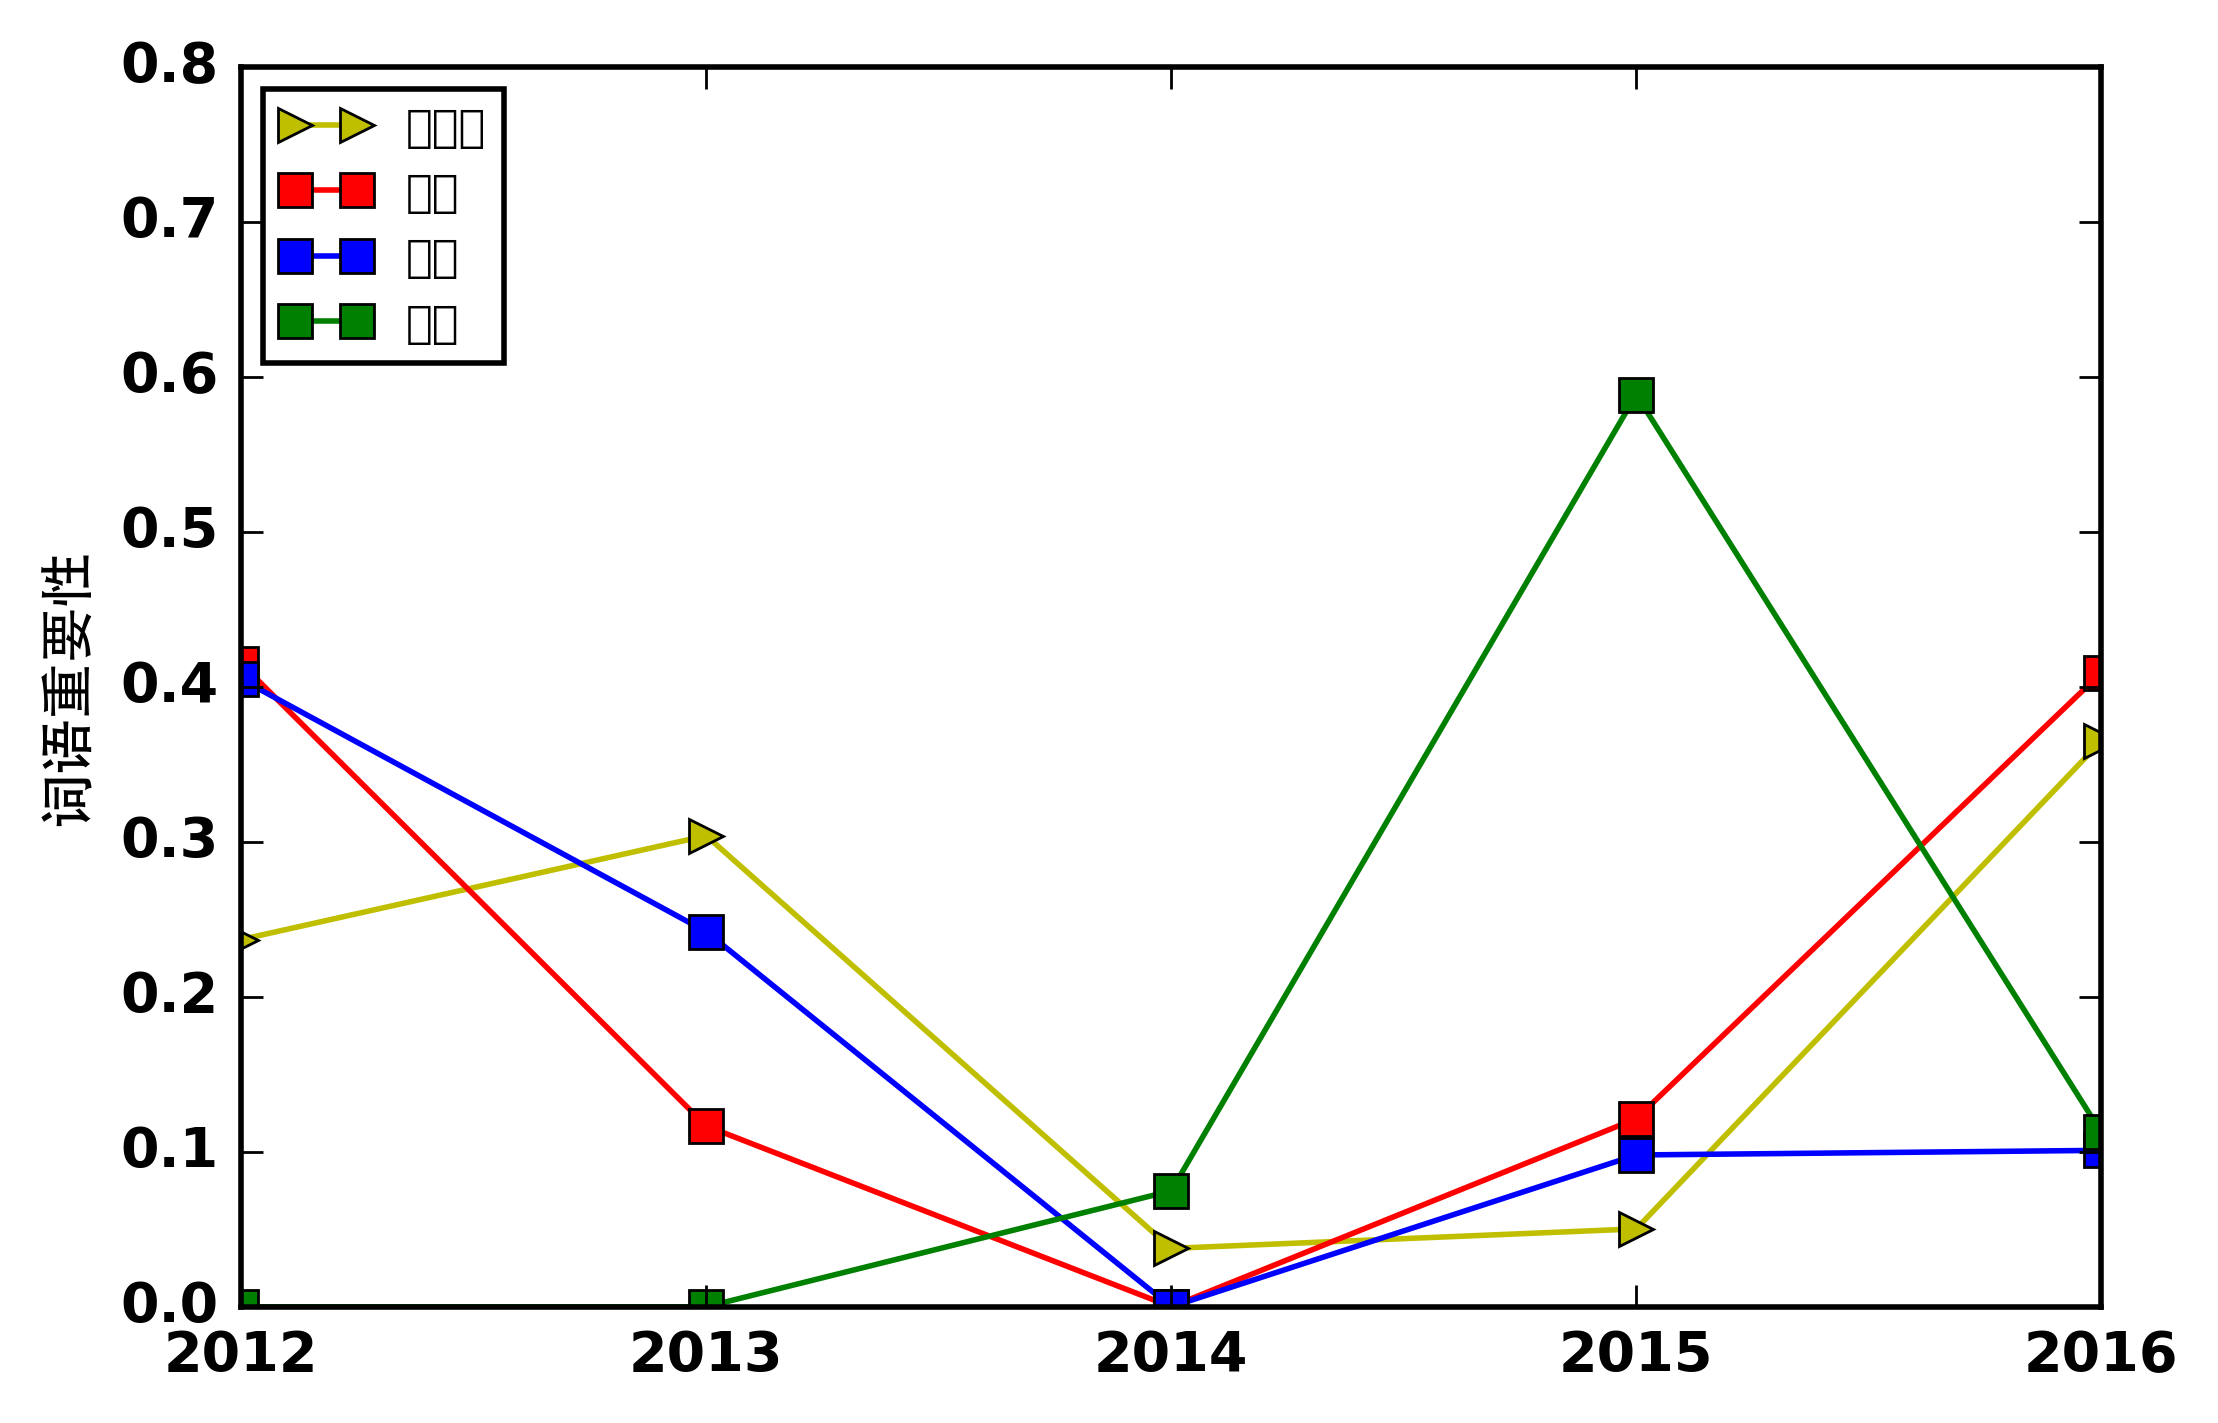

In [140]:
from collections import OrderedDict
def plotEvolution(word, color, linestyle, marker):
    cx = data[word]
    cx = OrderedDict(sorted(cx.iteritems(), key=lambda x : x[0], reverse=False))
    print cx
    plt.plot( cx.keys(),cx.values(), color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=8)
    plt.ylabel(u'词语重要性',fontproperties=zhfont1)
    plt.xticks(range(min(cx.keys()),max(cx.keys())+1),cx.keys()[0:len(cx)])
    plt.ylim(0,0.8)
    
plotEvolution(u'互联网','y', '-', '>')
plotEvolution(u'分享','r', '-', 's')
plotEvolution(u'开发','b', '-', 's')
plotEvolution(u'民主','g', '-', 's')

## 上图，黄色三角表示“互联网”，红色方框表示“分享”，蓝色方框表示“开发”，绿色方框表示“民主”，通过折线图可以看到2012年至2016年，以上各关键词在文本中的重要性变化。

## 备注：mac版无法解决中文显示问题。

## 4.6 关键词Kmeans聚类分析

In [107]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
dataX = []
wordX = []
for word in top60:
    dataX.append(data[word].values()[-40:])
    wordX.append(word)
dataX = np.array(dataX)

In [156]:
dataX

array([[ 0.18889842,  0.57272004,  1.        ,  0.27426843,  0.12809357],
       [ 1.        ,  0.16038447,  0.33692995,  0.07681256,  0.58090602],
       [ 0.20381214,  0.5422958 ,  0.31466995,  0.06889733,  0.2127579 ],
       [ 0.16150188,  0.        ,  0.        ,  1.        ,  0.13225155],
       [ 0.23268908,  0.20464413,  0.08807793,  0.07651783,  0.68895416],
       [ 0.28679866,  0.38023139,  0.38673916,  0.05937008,  0.13398701],
       [ 0.42720934,  0.15079884,  0.        ,  0.04673346,  0.60779176],
       [ 0.42505263,  0.18102116,  0.12072134,  0.        ,  0.50094714],
       [ 0.06675157,  0.52641656,  0.37023987,  0.18469095,  0.        ],
       [ 0.07665796,  0.        ,  0.        ,  0.10426601,  0.94894913],
       [ 0.        ,  0.        ,  0.11138369,  0.01462029,  1.        ],
       [ 0.40896473,  0.4149109 ,  0.11664847,  0.        ,  0.1213664 ],
       [ 0.32605653,  0.26518787,  0.13131233,  0.06055682,  0.24940184],
       [ 0.25670398,  0.47767999,  0.2

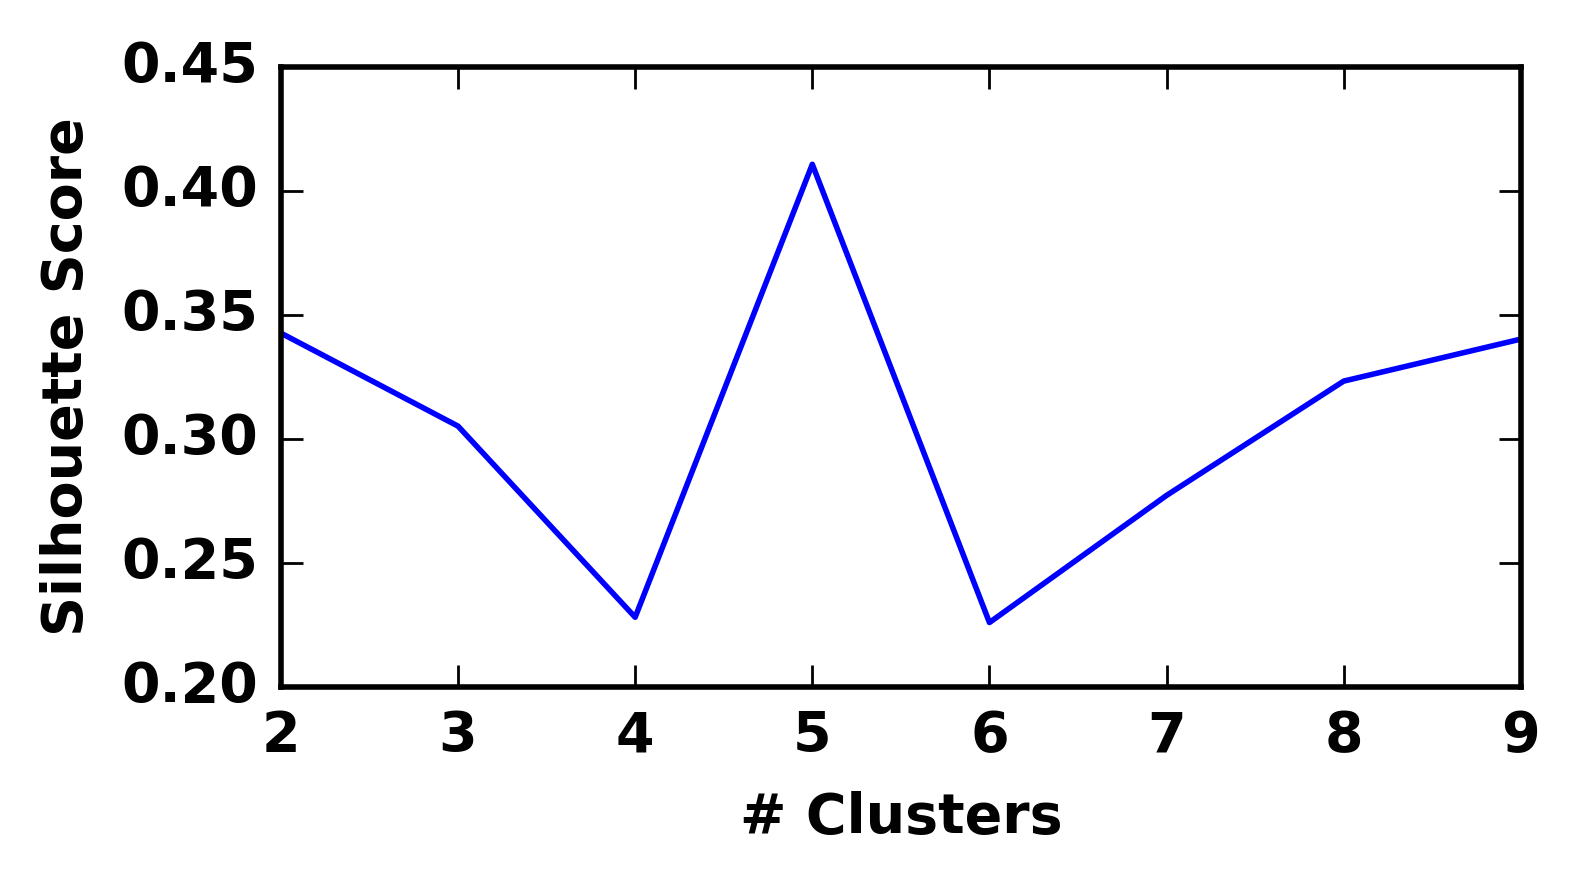

In [157]:
import numpy as np
from sklearn.cluster import KMeans
silhouette_score = []
for cluster_num in range(2, 10):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=1).fit(dataX)
    labels = kmeans_model.labels_
    sscore = metrics.silhouette_score(dataX, labels, metric='euclidean')
    silhouette_score.append(sscore)

fig = plt.figure(figsize=(4, 2),facecolor='white')    
plt.plot(range(2, 10), silhouette_score)
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [158]:
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(dataX)
labels = kmeans_model.labels_
labels

array([3, 1, 2, 4, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [159]:
print ' '.join(wordX)

用户 美国 网络 香港 世界 社交 社会 发展 员工 大陆 台湾 分享 文章 朋友 时间 色情网站 互联网 股价 内容 生活 软件 市场 开发 信息 民主 新闻 工作 政治 媒体 客户 广告 原生 手机 脸谱 方式 学习 政府 文化 技术 消息 关系 民众 系统 脸书 全球 发布 行业 分析 注册 平台 股票 报告 访问量 东西 工程师 产品 影响 超过 组织 投资


In [160]:
print '第1簇:','\t'.join([wordX[index] for index in np.where(labels==0)[0]])
print '第2簇:','\t'.join([wordX[index] for index in np.where(labels==1)[0]])
print '第3簇:','\t'.join([wordX[index] for index in np.where(labels==2)[0]])
print '第4簇:','\t'.join([wordX[index] for index in np.where(labels==3)[0]])
print '第5簇:','\t'.join([wordX[index] for index in np.where(labels==4)[0]])

第1簇: 色情网站	股价	原生	股票	访问量
第2簇: 美国	世界	社会	发展	大陆	台湾	民主	政治
第3簇: 网络	社交	员工	分享	文章	朋友	时间	互联网	内容	生活	软件	市场	开发	信息	新闻	工作	媒体	客户	广告	方式	学习	政府	文化	技术	消息	关系	民众	系统	脸书	全球	发布	行业	分析	注册	平台	报告	东西	工程师	产品	影响	超过	组织	投资
第4簇: 用户	手机	脸谱
第5簇: 香港


## 使用Kmeans聚类分析的方法，对2012年至2016年以Facebook为关键词的全部回帖进行文本分析，通过多次尝试发现，将出现频率最高的60个关键词聚成五簇时，模型分数最高。分别输出五簇数据，得到了以上的聚类结果。可以看到每一簇的文字的确具有较密切的相关性，属于同一主题。聚类结果比较理想。

## 5.天涯Facebook相关帖子主题模型构建

In [14]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [15]:
def clean_txt(txt):
    for i in [u'、', u'，', u'—', u'！', u'。', u'《', u'》', u'（', u'）']:
        txt = txt.replace(i, ' ')
    return txt

In [16]:
len(reports1)

5

In [18]:
import jieba.analyse
def cleancntxt(txt, stopwords):
    tfidf1000= jieba.analyse.extract_tags(txt, topK=1000, withWeight=False)
    seg_generator = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_generator if i not in stopwords]
    seg_list = [i for i in seg_list if i != u' ']
    seg_list = [i for i in seg_list if i in tfidf1000]
    return(seg_list)
processed_docs = [cleancntxt(doc, stopwords) for doc in reports1]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
print "In the corpus there are", len(word_count_dict), "unique tokens"
# word_count_dict.filter_extremes(no_below=5, no_above=0.2) # word must appear >5 times, and no more than 10% documents
# print "After filtering, in the corpus there are only", len(word_count_dict), "unique tokens"
bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]

In [19]:
tfidf = models.TfidfModel(bag_of_words_corpus )
corpus_tfidf = tfidf[bag_of_words_corpus ]
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=20, id2word=word_count_dict, passes=10)

In [20]:
def inferTopicNumber(bag_of_words_corpus, num, word_count_dict):
    lda_model = gensim.models.LdaModel(bag_of_words_corpus, num_topics=num, id2word=word_count_dict, passes=10)
    _ = lda_model.print_topics(-1) #use _ for throwaway variables.
    logperplexity = lda_model.log_perplexity(bag_of_words_corpus)
    return logperplexity
perplexity_list = [inferTopicNumber(bag_of_words_corpus, num, word_count_dict) for num in [5, 15, 20, 25, 30, 35, 40 ]]

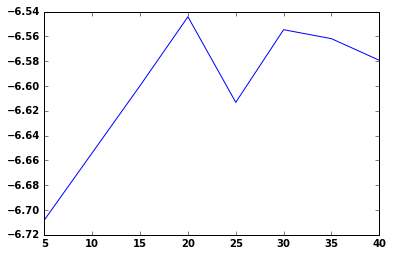

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([5, 15, 20, 25, 30, 35, 40], perplexity_list)

In [22]:
topictermlist = lda_model.print_topics(-1)
topictermlist1 = list(topictermlist)

In [23]:
type(topictermlist1)

list

In [24]:
top2=[list(i) for i in topictermlist1]
top2[1]

[1,
 u'0.000*\u4e2d\u56fd + 0.000*\u697c\u4e3b + 0.000*\u786e\u5b9e + 0.000*\u7684\u8bdd + 0.000*\u8003\u8651 + 0.000*\u6539\u53d8 + 0.000*\u7167\u7247 + 0.000*\u63d0\u4f9b + 0.000*\u5168\u4e16\u754c + 0.000*34']

In [25]:
top3=[str(i) for i in topictermlist1]

In [26]:
top_words = [[j.split('*')[1] for j in i.split(' + ')] for i in top3]
for i in top_words: print " ".join(i) + '\n'

In [27]:
for i in top3:   
    y=str(i).split(' + ')
    for i in y:
        a=i.decode('unicode_escape')
        print a

In [28]:
import numpy as np
x=[]
j=[(0, '0.002', '0.002', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001'),
   (1, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (2, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (3, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (4, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (5, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (6, '0.003', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001'),
   (7, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (8, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (9, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (10,'0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (11, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (12, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (13, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (14, '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001'),
   (15, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (16, '0.002', '0.002', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001'),
   (17, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (18, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (19, '0.002', '0.002', '0.002', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001')]
for i in j:
    top_words_shares = map(float, i)
    x.append(top_words_shares)
    top_words_shares=x
print top_words_shares
def weightvalue(x):
    return (x - np.min(top_words_shares))*40/(np.max(top_words_shares) -np.min(top_words_shares)) + 10
 
top_words_shares = [map(weightvalue, i) for i in top_words_shares]  

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (10.0, 4.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title(u'主题 #{}'.format(t+1), size = 5)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word, fontsize= np.log(share*10))
        n += 1

In [39]:
def weightvalue(x):
    return (x - np.min(top_words_shares))*40/(np.max(top_words_shares) -np.min(top_words_shares)) + 10
 
top_words_shares = [map(weightvalue, i) for i in top_words_shares]  
from pylab import *
mpl.rcParams['font.sans-serif']=['STSong']

import matplotlib.pyplot as plt
import matplotlib
zhfont1 = matplotlib.font_manager.FontProperties(fname='/Users/zhangyixin/Desktop/facebook/huawenheiti.ttf')

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (10.0, 4.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title(u'主题#%i'%t,size=10,fontproperties=zhfont1)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word.decode('unicode_escape'), fontsize= np.log(share*10)*2,fontproperties=zhfont1)
        n += 1

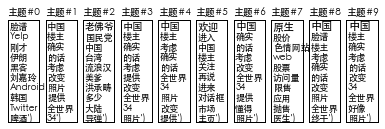

In [40]:
plotTopics(0, 10)

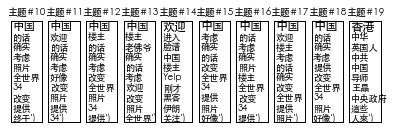

In [41]:
plotTopics(10, 20)

## 6.天涯Facebook相关帖子推荐系统

In [54]:
import pandas as pd
file_name='/Users/zhangyixin/Desktop/facebook/facebook_threads_network.txt'
df = pd.read_csv(file_name, sep = "\t", header=None)
df[:2]

,0,1,2,3,4,5
0,1,/post-free-5495969-1.shtml,2016-06-14 15:04:00,81346212,梁海欣故事,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...
1,1,/post-free-5495969-1.shtml,2016-06-14 15:59:07,113781379,晋城妇科医院,母亲~我爱你~


In [55]:
df=df.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
df[:5]

,page_num,link,time,author,author_name,reply
0,1,/post-free-5495969-1.shtml,2016-06-14 15:04:00,81346212,梁海欣故事,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...
1,1,/post-free-5495969-1.shtml,2016-06-14 15:59:07,113781379,晋城妇科医院,母亲~我爱你~
2,1,/post-free-5483503-1.shtml,2016-06-01 08:52:00,113032738,sunlight808,中文翻译 Facebook Page: Help Our Sister Li Ouyang...
3,1,/post-free-5483503-1.shtml,2016-06-11 09:40:44,113032738,sunlight808,现在是六月十日晚9：37分，马上要回教会shelter了，临走前贴一个今天的Facebook...
4,1,/post-free-5483503-1.shtml,2016-06-21 08:27:03,16942633,jkni,姑娘！不读书的后果很严重！放弃大学和他人同居，风险很大


In [56]:
def get_link_id(link):
    return link.split('-')[2]

count={}
size=len(df['link'])
for i in xrange(size):
    linkId=get_link_id(df['link'][i])
    authorId=df['author'][i]
    key="%s %s"%(linkId,authorId)
#     if key in count:
    if count.has_key(key):
        count[key]=count[key]+1
    else:  
        count[key]=1

In [57]:
print len(count)
# print sorted(count.iteritems(),key=lambda d:d[1], reverse=True)
print len(df['link'])
print len(set(df['link']))
print len(set(df['author']))

525
21620
50
481


In [58]:
count_file="/Users/zhangyixin/Desktop/facebook/namelist.txt"
with open(count_file,'w') as p:
    for key in count:
        p.write("%s %i\n"%(key,count[key]))

In [59]:
import graphlab
graphlab.canvas.set_target("ipynb")
# set canvas to show sframes and sgraphs in ipython notebook
import matplotlib.pyplot as plt
%matplotlib inline

A newer version of GraphLab Create (v1.10.1) is available! Your current version is v1.8.5.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [60]:
data = graphlab.SFrame.read_csv('/Users/zhangyixin/Desktop/facebook/namelist.txt', delimiter='\n', 
                                header=False)['X1'].apply(lambda x: x.split(' ')).unpack()
for col in data.column_names():
    data[col] = data[col].astype(int)
data.rename({'X.0': 'link', 'X.1': 'user', 'X.2': 'rating'})
data.save('ratings')


This non-commercial license of GraphLab Create is assigned to 421901797@qq.com and will expire on May 20, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-06-29 20:38:05,426 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: /tmp/graphlab_server_1467203881.log


Finished parsing file /Users/zhangyixin/Desktop/facebook/namelist.txt

Parsing completed. Parsed 100 lines in 0.037411 secs.

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/zhangyixin/Desktop/facebook/namelist.txt

Parsing completed. Parsed 525 lines in 0.015892 secs.

In [61]:
data

link,user,rating
5326309,21727528,10
5308428,107129779,10
4707593,11970362,10
4463186,109379596,10
5308428,106973934,10
4707593,94767839,10
4707593,33445734,10
4463186,108231026,10
3143632,108270221,10
4463186,63750951,10


In [62]:
(train_set, test_set) = data.random_split(0.95, seed=1)
m = graphlab.recommender.create(train_set, 'user', 'link', 'rating')

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 502 observations with 462 users and 50 items.

Data prepared in: 0.024701s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 502 / 502 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | 40232.9                                  |

| 1       | 12.5              | 43057                                    |

| 2       | 6.25              | 40111.5                                  |

| 3       | 3.125             | 43965.1                                  |

| 4       | 1.5625            | 40819.2                                  |

| 5       | 0.78125           | 43727.4                                  |

+---------+-------------------+------------------------------------------+

| Final   | 6.25              | 40111.5                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 111us        | 52611.7           | 163.741               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 11.737ms     | 52009.2           | 165.613               | 6.25        |

| 2       | 14.661ms     | 51352.9           | 166.349               | 3.71627     |

| 3       | 22.083ms     | 42736.9           | 156.322               | 2.74182     |

| 4       | 34.03ms      | 49803.3           | 194.589               | 2.20971     |

| 5       | 46.34ms      | 45947.9           | 195.196               | 1.57179     |

| 6       | 48.571ms     | 45544             | 202.783               | 1.15279     |

| 11      | 71.119ms     | 41213.1           | 194.668               | 0.307633    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 39717.2

Final training RMSE: 196.811

In [63]:
m

Class                           : RankingFactorizationRecommender

Schema
------
User ID                         : user
Item ID                         : link
Target                          : rating
Additional observation features : 0
Number of user side features    : 0
Number of item side features    : 0

Statistics
----------
Number of observations          : 502
Number of users                 : 462
Number of items                 : 50

Training summary
----------------
Training time                   : 1.4497

Model Parameters
----------------
Model class                     : RankingFactorizationRecommender
num_factors                     : 32
binary_target                   : 0
side_data_factorization         : 1
solver                          : auto
nmf                             : 0
max_iterations                  : 25

Regularization Settings
-----------------------
regularization                  : 0.0
regularization_type             : normal
linear_regularization         

In [64]:
m2 = graphlab.item_similarity_recommender.create(train_set, 'user', 'link', 'rating',
                                 similarity_type='pearson')

Recsys training: model = item_similarity

Preparing data set.

Data has 502 observations with 462 users and 50 items.

Data prepared in: 0.006603s

Computing item similarity statistics:

Computing most similar items for 50 items:

Finished training in 0.009003s

Finished prediction in 0.003597s

In [65]:
m2

Class                           : ItemSimilarityRecommender

Schema
------
User ID                         : user
Item ID                         : link
Target                          : rating
Additional observation features : 0
Number of user side features    : 0
Number of item side features    : 0

Statistics
----------
Number of observations          : 502
Number of users                 : 462
Number of items                 : 50

Training summary
----------------
Training time                   : 0.011

Model Parameters
----------------
Model class                     : ItemSimilarityRecommender
only_top_k                      : 100
threshold                       : 0.001
similarity_type                 : pearson
training_method                 : auto

In [66]:
m.get_similar_items([4463186]) 

Getting similar items completed in 0.003487

link,similar,score,rank
4463186,3143632,0.460250020027,1
4463186,4663707,0.445852279663,2
4463186,4707593,0.435507893562,3
4463186,2944895,0.434712618589,4
4463186,4888049,0.388471662998,5
4463186,4050909,0.382729768753,6
4463186,2872473,0.377387017012,7
4463186,5189885,0.375985592604,8
4463186,5369532,0.375468403101,9
4463186,3266225,0.366972625256,10


In [67]:
recs = m.recommend()
recs

user,link,score,rank
21727528,5308428,-285.728605795,1
21727528,4200312,-333.02187972,2
21727528,3143632,-359.639128256,3
21727528,2929859,-364.308439779,4
21727528,3456838,-366.518095541,5
21727528,4725959,-377.348204183,6
21727528,4110003,-420.520323324,7
21727528,5375770,-423.060637045,8
21727528,5154624,-440.277739095,9
21727528,3665464,-442.249418783,10


In [68]:
m.save('tianyamodel')

## 7.天涯Facebook相关帖子回帖网络构建

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
dtt = []
with open('/Users/zhangyixin/Desktop/facebook/facebook_threads_network.txt', 'r') as f:
    for line in f:
        pnum, link, time, author_id, author, content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
len(dtt)

21620

In [74]:
import pandas as pd
dt = pd.DataFrame(dtt)
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
dt[:5]

,page_num,link,time,author,author_name,reply
0,1,/post-free-5495969-1.shtml,2016-06-14 15:04:00,81346212,梁海欣故事,晋城婦科医、院【山西晋城市瑞丰路986号】阅读，呮需一秒。精采，尽在掌握! 熊仔头粤语潮片...
1,1,/post-free-5495969-1.shtml,2016-06-14 15:59:07,113781379,晋城妇科医院,母亲~我爱你~
2,1,/post-free-5483503-1.shtml,2016-06-01 08:52:00,113032738,sunlight808,中文翻译 Facebook Page: Help Our Sister Li Ouyang...
3,1,/post-free-5483503-1.shtml,2016-06-11 09:40:44,113032738,sunlight808,现在是六月十日晚9：37分，马上要回教会shelter了，临走前贴一个今天的Facebook...
4,1,/post-free-5483503-1.shtml,2016-06-21 08:27:03,16942633,jkni,姑娘！不读书的后果很严重！放弃大学和他人同居，风险很大


In [75]:
import re
for k, tweet in enumerate(dt.reply[:50]):
    tweet = tweet.decode('utf8')
    RTpattern = r'''@(\w+)\s'''
    for person in re.findall(RTpattern, tweet, re.UNICODE):
        print k,'\t',dt.author_name[k],'\t', person,'\t\t', tweet[:30]

5 	sunlight808 	jkni 		@jkni 2016-06-21 08:27:03　　姑娘！
23 	空山2016 	吃Oreo的Leo 		@吃Oreo的Leo 2016-01-22 11:48:52
24 	空山2016 	ldy2311 		@ldy2311 2016-01-22 11:51:07　　
30 	空山2016 	woszmf 		@woszmf 2016-01-22 13:51:17　　可
31 	空山2016 	qq3282532 		@qq3282532 2016-01-22 13:55:17
34 	空山2016 	从来的理由侔 		@从来的理由侔 2016-01-22 14:42:05　　打
36 	空山2016 	阳间过客 		@阳间过客 2016-01-22 14:54:15　　很难，
37 	空山2016 	阳间过客 		@阳间过客 2016-01-22 14:54:15　　很难，


In [76]:
import pandas as pd
df = pd.read_csv('/Users/zhangyixin/Desktop/facebook/facebooklist.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:2]

,title,link,author,author_page,click,reply,time
0,"母亲节刷暴香港facebook ,广东朋友圈嘅MV首歌就叫做《青葱》",/post-free-5495969-1.shtml,梁海欣故事,http://www.tianya.cn/81346212,24,1,2016-06-14 15:04
1,5月30日Facebook有关欧阳黎老师家暴的新帖和照片,/post-free-5483503-1.shtml,sunlight808,http://www.tianya.cn/113032738,203,4,2016-06-01 08:52


In [77]:
link_author_dict = {}
for i in range(len(df)):
    link_author_dict[df.link[i]] =df.author[i] 

In [78]:
graph = []
for k, tweet in enumerate(dt.reply):
    tweet = tweet.decode('utf8')
    url = dt.link[k]
    RTpattern = r'''@(\w+)\s'''
    persons = re.findall(RTpattern, tweet, re.UNICODE)
    if persons:
        for person in persons:
            graph.append([dt.author_name[k].decode('utf8'), person])
    elif link_author_dict.has_key(url):
        graph.append( [dt.author_name[k].decode('utf8'), link_author_dict[url].decode('utf8')]  )
    else:
        #no  name
         graph.append( [dt.author_name[k].decode('utf8'), url]  )

In [79]:
len(graph)

23260

In [80]:
for x, y in graph[:10]:
    print x, y

梁海欣故事 梁海欣故事
晋城妇科医院 梁海欣故事
sunlight808 sunlight808
sunlight808 sunlight808
jkni sunlight808
sunlight808 jkni
灵瑞07 灵瑞07
GaGaMatch社区 GaGaMatch社区
guojiazhixu guojiazhixu
guojiazhixu guojiazhixu


In [82]:
import networkx as nx
G = nx.DiGraph()
for x,y in graph:
    if x != y:
        G.add_edge(x,y)

In [83]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 464\nNumber of edges: 642\nAverage in degree:   1.3836\nAverage out degree:   1.3836'

In [84]:
GU=G.to_undirected(reciprocal=True)
graphs = list(nx.connected_component_subgraphs(GU))

In [85]:
import numpy as np
size = []
for i in graphs:
    size.append(len(i.nodes()))
len(size), np.max(size)

(423, 11)

In [86]:
gs = []
for i in graphs:
    if len(i.nodes()) >5:
        gs.append(i)
len(gs)

2

In [87]:
for g in gs:
    print len(g.nodes())

6
11


In [88]:
gs = []
for i in graphs:
    if len(i.nodes()) >2:
        gs.append(i)
len(gs)

9

In [89]:
for g in gs:
    print len(g.nodes())

3
6
11
3
4
5
5
3
3


In [91]:
g_max = gs[2]
len(g_max.nodes())

11

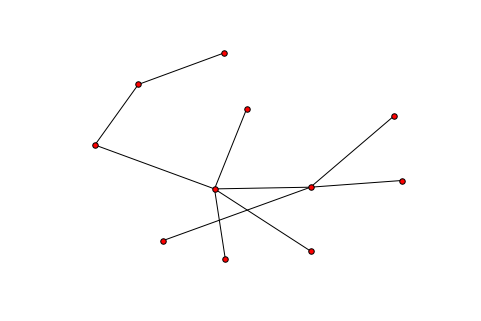

In [92]:
pos = nx.spring_layout(g_max)          
#定义一个布局，此处采用了spectral布局方式，后变还会介绍其它布局方式，注意图形上的区别
nx.draw(g_max,pos,with_labels=False,node_size = 30)  
#绘制规则图的图形，with_labels决定节点是非带标签（编号）,node_size是节点的直径
plt.show()  #显示图形

In [ ]:
#保存文件
with open('/Users/zhangyixin/Desktop/facebook/tianya_facebooknetwork.csv', 'a') as f:
    for x, y in g_max.edges():
        f.write(x.encode('utf8') + ',' + y.encode('utf8') + '\n')

## 8.总结

## 在本次实验中，我组对天涯论坛上“Facebook”相关的主题贴进行了数据抓取和分析，得出了一些有效的结论如天涯帖子的关注度变化趋势、主题贴关键词变化趋势、聚类等等。
## 通过本次实验，我组成员对python语言和Anaconda计算环境有了比较完整和深入的认识，掌握了使用python进行网络数据抓取的处理、分析方法，包括数据获取、清洗、文本分析等。在实验过程中，我组成员反复调试了各种代码问题，克服了许多困难，对python语言的掌握程度有了很大提升，也对数据抓取有了比较直观的认识。

## -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

## 老师批作业辛苦啦～祝老师工作顺利，身体健康，合家欢乐～